<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío 1 - Limpieza de datos</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati](#section_properati)

[Inspección de la tabla sin limpieza previa](#section_inspeccion)

[Creación de función general para el análisis de columnas y sus valores](#section_creacion_de_funcion)

$\hspace{.5cm}$[Funcion my_info_columnas()](#section_funcion_1)
  
$\hspace{.5cm}$[Funcion my_colmnas_valores()](#section_funcion_2)

[Eliminacion de columnas redundantes](#section_eliminacion)


[Análisis de las variables más importantes](#section_analisis_var)

[Imputacion de valores faltante por medio de otro campo o estadístico de grupo](#section_imputacion)

[Diagrama de expensas para los valores existentes](#section_expensas)

[Gráficos variables categóricas](#section_categorizacion)

[Gráficos variables contínua](#section_graficos)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Debemos asesorar a la inmobiliaria para desarrollar un modelo de regresión que permita predecir el **precio por metro cuadrado** de una propiedad. 

El objetivo final es que el modelo que desarrollen sea utilizado como **tasador automático** a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El nombre del dataset es *properati.csv*.

Para eso deberemos:
- Efectuar una limpieza del dataset provisto. Particularmente, debemos diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [1]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...".NO existe display.min_columns
pd.set_option("display.max_rows", 700)     # Limita la visualización a max 20 columnas. Si se excede genera "..."
pd.set_option("display.min_rows", 20)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
#pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo properati.csv

[volver a TOC](#section_toc)

In [4]:
# Importación del archivo de Properati:
data = pd.read_csv("properati.csv", sep = ",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [5]:
# Muestra de la tabla:
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
34475,34475,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.7337896783,-58.3053310369",-34.733790,-58.305331,150000.0,USD,2646675.00,150000.00,130.0,100.0,1153.846154,1500.0,NaN,NaN,NaN,http://www.properati.com.ar/18c0w_venta_casa_q...,Ubicado en La Rioja entre Calle 388 y Calle 38...,Chalet Amplio,https://thumbs4.properati.com/1/JAt-1PKYmkamqM...
96797,96797,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,NaN,2393555.0,ARS,2368586.38,134239.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bj74_venta_depart...,"Departamento con Seguridad nocturna, Córdoba, ...",Departamento - General Paz,NaN
6141,6141,sell,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.5967803,-60.7167404",-31.596780,-60.716740,1150000.0,ARS,1138003.55,64496.22,50.0,50.0,1289.924400,23000.0,NaN,2.0,NaN,http://www.properati.com.ar/15syf_venta_depart...,Se venden departamentos a refaccionar. Incluye...,VENDO DEPARTAMENTOS PARA REFACCIONAR,https://thumbs4.properati.com/7/x78Dd9H67Q1qtU...
58915,58915,sell,house,Altos de Matheu,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Al...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3879348398,-58.830948649",-34.387935,-58.830949,138000.0,USD,2434941.00,138000.00,150.0,150.0,920.000000,920.0,NaN,NaN,NaN,http://www.properati.com.ar/19whq_venta_casa_a...,"JMF Casa Barrio Altos de Matheu, Escobar Acce...","JMF Casa Barrio Altos de Matheu, Escobar",https://thumbs4.properati.com/1/VZrU_QUktXy1Ow...
100976,100976,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,NaN,NaN,NaN,135000.0,USD,2382007.50,135000.00,100.0,100.0,1350.000000,1350.0,NaN,NaN,NaN,http://www.properati.com.ar/1boq5_venta_depart...,"Palier privado, living room en L de 6x4, cómod...",Departamento - Microcentro,https://thumbs4.properati.com/7/dPMMnQEqPthtzA...


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla sin limpieza previa

[volver a TOC](#section_toc)

Se realiza un análisis básico para entender los datos e información que almacena la tabla:

In [6]:
# Dimensiones:
print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (121220, 26)


In [7]:
# Tipo de datos de las columnas:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

Analizando las columnas una a una podemos ver que los tipos de datos son los correctos segun muestra el df.

In [8]:
# Nombre de las columnas:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [9]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():
data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(10))

# Revisamos que no se alteraron los tipos de datos:
data.dtypes

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
120666,120666,SELL,APARTMENT,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,ARGENTINA,CÓRDOBA,3860259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1CI8U_VENTA_DEPART...,SE TRATA DE UN EXCELENTE DEPARTAMENTO UBICADO ...,DEPARTAMENTO - JARDIN,HTTPS://THUMBS4.PROPERATI.COM/3/SJGCLG6H8VUBR7...
34125,34125,SELL,APARTMENT,SAN MARTÍN,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|GENERAL SA...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,NaN,NaN,NaN,NaN,150000.0,USD,2646675.00,150000.00,NaN,63.0,NaN,2380.952381,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18BB8_VENTA_DEPART...,"A ESTRENAR, EXCELENTE DEPARTAMENTO AL FRENTE, ...",DEPARTAMENTO EN VENTA SAN MARTIN / SAN MARTIN ...,HTTPS://THUMBS4.PROPERATI.COM/8/QLBQ-QFABCYEUG...
16901,16901,SELL,APARTMENT,SAN ISIDRO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|SAN ISIDRO|,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,3428983.0,NaN,NaN,NaN,170000.0,USD,2999565.00,170000.00,NaN,64.0,NaN,2656.250000,3.0,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/16ZWI_VENTA_DEPART...,MUY BUEN DEPARTAMENTO DE 3 AMBIENTES SÃºPER IM...,"DEPARTAMENTO CON TELÉFONO EN ALBERTI, MONSEÑOR...",HTTPS://THUMBS4.PROPERATI.COM/3/BXPWFDXDII79V-...
73671,73671,SELL,APARTMENT,LANÚS,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LANÚS|LANÚS|,ARGENTINA,BS.AS. G.B.A. ZONA SUR,NaN,NaN,NaN,NaN,75000.0,USD,1323337.50,75000.00,45.0,43.0,1666.666667,1744.186047,NaN,NaN,1.0,HTTP://WWW.PROPERATI.COM.AR/1ANZK_VENTA_DEPART...,COMPLEJO SARMIENTO SOHO UNIDADES DE 2 AMBIENTE...,DEPARTAMENTO DOS AMBIENTES,HTTPS://THUMBS4.PROPERATI.COM/4/DI8JSZL5LEQK8Y...
59821,59821,SELL,HOUSE,VILLA LUZURIAGA,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|LA MATANZA...,ARGENTINA,BS.AS. G.B.A. ZONA OESTE,3427406.0,NaN,NaN,NaN,150000.0,USD,2646675.00,150000.00,66.0,65.0,2272.727273,2307.692308,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19Y02_VENTA_CASA_V...,EXCELENTE DUPLEX A ESTRENAR CON MUY BUENOS DE...,DUPLEX EN VENTA VILLA LUZURIAGA / LA MATANZA (...,HTTPS://THUMBS4.PROPERATI.COM/1/PHN8BC8M2J07Z4...
75742,75742,SELL,APARTMENT,MAR DEL PLATA,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,ARGENTINA,BUENOS AIRES COSTA ATLÁNTICA,3430863.0,NaN,NaN,NaN,235000.0,USD,4146457.50,235000.00,90.0,90.0,2611.111111,2611.111111,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AQNP_VENTA_DEPART...,DEPARTAMENTO 3 AMBIENTES . *** A ESTRENAR *** ...,DPTO. 3 AMB. A ESTRENAR VISTA PLENA AL MAR!!,HTTPS://THUMBS4.PROPERATI.COM/9/LOFKYTWHSUHQZY...
83668,83668,SELL,HOUSE,PUNILLA,|ARGENTINA|CÓRDOBA|PUNILLA|,ARGENTINA,CÓRDOBA,3839996.0,NaN,NaN,NaN,1300000.0,ARS,1286438.79,72908.77,NaN,97.0,NaN,13402.061856,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1B0TG_VENTA_CASA_P...,SE VENDE PROPIEDAD EN ZONA SERRANAA DOS CUADRA...,CASA - VALLE HERMOSO,HTTPS://THUMBS4.PROPERATI.COM/6/AC15M7R5TQTBOE...
18790,18790,SELL,HOUSE,BARRIO SANTA TERESA,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|BARR...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,NaN,"-34.39963,-58.69361",-34.39963,-58.69361,365000.0,USD,6440242.50,365000.00,NaN,210.0,NaN,1738.095238,NaN,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/177WU_VENTA_CASA_T...,CORREDOR RESPONSABLE: ALEJANDRO SESSAREGO - CM...,DIVINA CASA A LA LAGUNA EN SANTA TERESA,HTTPS://THUMBS4.PROPERATI.COM/7/9EIB3CQKGU4GM2...
93425,93425,SELL,HOUSE,NORDELTA,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|NORD...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,NaN,NaN,NaN,NaN,540000.0,USD,9528030.00,540000.00,NaN,250.0,NaN,2160.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1BE5G_VENTA_CASA_N...,"TIGRE, NORDELTA, LAS TIPAS - HERMOSA CASA DE P...",CASA - LAS TIPAS,HTTPS://THUMBS4.PROPERATI.COM/6/ZBK6YFWWWOXNIS...
103938,103938,SELL,APARTMENT,GENERAL PUEYRREDÓN,|ARGENTINA|BUENOS AIRES INTERIOR|GENERAL PUEYR...,ARGENTINA,BUENOS AIRES INTERIOR,3433782.0,

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [10]:
# Porcentaje de nulos por columnas:
(data.isnull().sum()/data.shape[0]*100).round(2)

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
dtype: float64

In [11]:
# Información general:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [12]:
# De las columnas numéricas podemos obtener ciertas estadísticas, excluyendo los valores NaN:
data.describe().round(2)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.00,102503.00,69670.00,69670.00,1.008100e+05,1.008100e+05,100810.00,81892.00,101313.00,68617.00,87658.00,7899.00,47390.00,14262.00
mean,60609.50,3574442.32,-34.63,-59.27,4.685259e+05,4.229397e+06,239700.58,233.80,133.05,2160.09,6912.22,17.45,3.08,5009.23
std,34993.34,354130.62,1.98,2.30,2.260101e+06,6.904714e+06,391323.88,1782.22,724.35,2759.29,28378.64,120.24,1.86,120440.26
min,0.00,3427208.00,-54.82,-75.68,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.60,1.51,1.00,1.00,1.00
25%,30304.75,3430234.00,-34.67,-58.73,1.100000e+05,1.583309e+06,89733.88,50.00,45.00,1218.18,1550.00,1.00,2.00,1000.00
50%,60609.50,3433910.00,-34.60,-58.48,1.850000e+05,2.558452e+06,145000.00,84.00,75.00,1800.00,2213.11,3.00,3.00,2000.00
75%,90914.25,3836668.00,-34.44,-58.40,4.200000e+05,4.675792e+06,265000.00,200.00,150.00,2486.41,3355.55,6.00,4.00,4000.00
max,121219.00,6948895.00,4.55,-53.73,6.500000e+08,8.212711e+08,46545445.00,200000.00,187000.00,206333.33,3999999.96,3150.00,32.00,10001500.00


In [13]:
# De las columnas NO numéricas (categóricas) podemos obtener ciertas estadísticas también:
data.describe(include=['object', 'bool'])      # Se especifica el tipo de dato a analizar.

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,currency,properati_url,description,title,image_thumbnail
count,121220,121220,121197,121220,121220,121220,69670,100809,121220,121218,121220,118108
unique,1,4,1060,1164,1,28,47203,4,121220,104004,71654,114389
top,SELL,APARTMENT,CÓRDOBA,|ARGENTINA|SANTA FE|ROSARIO|,ARGENTINA,CAPITAL FEDERAL,"-34.4026444,-58.6684776",USD,HTTP://WWW.PROPERATI.COM.AR/1AOHU_VENTA_DEPART...,AVISO LEGAL: LAS DESCRIPCIONES ARQUITECTÓNICAS...,DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/5/YYMIU8BHQI9KXC...
freq,121220,71065,9254,8504,121220,32316,312,87587,1,358,5025,255


---
<a id="section_creacion_de_funcion"></a> 
## Creación de función general para el análisis de columnas y sus valores

[volver a TOC](#section_toc)

Creamos una función que nos permite analizar rápidamente las columnas (valores nulos y no nulos) y otra que nos permte analizar los valores dentro de esa columna (value_counts)

<a id="section_funcion_1"></a> 
#### Función my_info_columnas()

[volver a TOC](#section_toc)

In [14]:
# Creamos una función que nos devuelve info de sus columnas. Recibe el dataframe y un argumento que indica si analizamos solo las columnas con algún valor NaN o todas.
def my_info_columnas(data, solo_nan='si'):
    data_null = data.isnull().sum()                                                                               # Df de elementos nulos.
    data_null_porc = (100*data_null/len(data)).round(2)                                                           # Df de elementos nulos %.
    data_null_concat = pd.concat([data_null, data_null_porc], axis=1)                                             # Concatena los df anteriores.
    data_null_ok = data_null_concat.rename(columns = {0 : 'Cantidad de NaN', 1 : '% de NaN'})                     # Renombra las columnas del df anterior.
    data_null_ok['Dtype'] = data.dtypes                                                                           # Pego el tipo de dato al df anterior.
    
    dict_unique_size = {}                                                                                         # Creao diccionario vacio.
    for col in data:                                                                                              # Quiero pegarle los valores únicos de cada columna.
        dict_unique_size[col] = data[col].unique().size                                                           # key = nombre de col, values = cant de unicos.
    
    serie_unique_size = pd.Series(dict_unique_size)                                                               # Convierto del diccionario a serie.
    data_null_ok['Valores Unicos'] = serie_unique_size                                                            # Lo agrego como otra columna.

    if solo_nan == 'si':                                                                                           # Creo if para ver si analizo todas las columnas o solo las NaN.
        data_null_ok = data_null_ok[data_null_ok.iloc[:,0] != 0].sort_values('% de NaN', ascending=False)          # Filtra y ordeno las columnas con algún NaN.
    else:
         data_null_ok = data_null_ok.sort_values(by = ['% de NaN','Cantidad de NaN'] , ascending = [False, False]) # Filtra y ordeno las columnas con algún NaN.
    
    print("Tu dataframe tiene:")
    print(str((data.isnull().sum().sum()/data.size*100).round(2)) + "% de valores NaN en total.")
    print(str(data.shape[0]) + " filas")
    
    if solo_nan == 'si':
        print(str(data.shape[1]) + " columnas de las cuales " + str(data_null_ok.shape[0]) + " tienen valores NaN:")
    else:
        print(str(data.shape[1]) + " columnas:")

    display(data_null_ok)
    return

In [15]:
my_info_columnas(data, solo_nan='si')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [16]:
my_info_columnas(data, solo_nan='no')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5


<a id="section_funcion_2"></a> 
#### Función my_columna_valores()

[volver a TOC](#section_toc)

In [17]:
# Creamos una función para analizar los valores de las diferentes columnas:
def my_columna_valores(data, col='todas'):                                                                       # Recibe el df y la columna a analizar.
    if col =='todas':
        for col in data:
            print("\nColumna: " + col + " ----------------------------------------------------\n")
            print("Cantidad de elementos únicos: ", data[col].unique().size)
            print(data[col].value_counts(dropna=False))
    else:
        print("Columna: " + col)
        print("Cantidad de elementos únicos: ", data[col].unique().size)
        print(data[col].value_counts(dropna=False))
    return

In [18]:
my_columna_valores(data, col='currency')        # Analizamos los valores de cada columna. Se le pasa el df + nombre de la columna. Si queremos todas, pasar 'todas'

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


In [19]:
my_columna_valores(data, col='todas')


Columna: Unnamed: 0 ----------------------------------------------------

Cantidad de elementos únicos:  121220
2047     1
54576    1
29988    1
32037    1
25894    1
27943    1
5416     1
7465     1
1322     1
3371     1
        ..
53967    1
10960    1
8913     1
15058    1
13011    1
2772     1
725      1
6870     1
4823     1
0        1
Name: Unnamed: 0, Length: 121220, dtype: int64

Columna: operation ----------------------------------------------------

Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64

Columna: property_type ----------------------------------------------------

Cantidad de elementos únicos:  4
APARTMENT    71065
HOUSE        40268
PH            5751
STORE         4136
Name: property_type, dtype: int64

Columna: place_name ----------------------------------------------------

Cantidad de elementos únicos:  1061
CÓRDOBA                                      9254
ROSARIO                                      8504
MAR DEL PLATA            

---
<a id="section_eliminacion"></a> 
## Eliminación de columnas redundantes

[volver a TOC](#section_toc)

Realizamos esta eliminación de columnas para poder optimizar el espacio de trabajo así como una mejor visualización de los datos necesarios
Por ejemplo la columna country_name siempre tiene el valor Argentina.

In [20]:
# Observando el dataframe notamos que Unnamed:  0 es igual al índice así que lo eliminamos.
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
           ...  
121210    121210
121211    121211
121212    121212
121213    121213
121214    121214
121215    121215
121216    121216
121217    121217
121218    121218
121219    121219
Name: Unnamed: 0, Length: 121220, dtype: int64

In [21]:
data.drop('Unnamed: 0', axis = 'columns', inplace=True)
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [22]:
# Vemos que operation y country_name toma un único valor para todo el df. Veamos cuales son:
my_columna_valores(data, col='operation')
my_columna_valores(data, col='country_name')

Columna: operation
Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64
Columna: country_name
Cantidad de elementos únicos:  1
ARGENTINA    121220
Name: country_name, dtype: int64


In [23]:
# Borremos la columna ya que son redundantes por lo menos por ahora:
data.drop(['operation', 'country_name'], axis = 'columns', inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

#### Análisis de columnas lat-lon, lat y lon

[volver a TOC](#section_toc)

El objetivo es eliminar columnas redundantes comparando si la información es la misma.

In [24]:
# Analicemos las columnas lat-lon con lat y lon por separado. Puede haber información redundante. Podemos prescindir de algunas columnas:
data_lat_lon = data[['lat-lon', 'lat', 'lon']]   # Nuevo df solo con estas columnas para su análisis.
data_lat_lon

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447
5,"-33.0140714,-58.519828",-33.014071,-58.519828
6,"-34.5329567,-58.5217825",-34.532957,-58.521782
7,"-34.5598729,-58.443362",-34.559873,-58.443362
8,"-34.5598729,-58.443362",-34.559873,-58.443362
9,"-32.942031,-60.7259192",-32.942031,-60.725919


In [25]:
# Analizo sus valores nulos a ver si son los mismos:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
3 columnas de las cuales 3 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523


Vemos que lat y lon están redondeados pero son los mismos. Tienen la misma cantidad de elementos nulos.
Tenemos dudas de los valores únicos, si serán los mismos por separado. Por lo tanto los separamos en columnas lat-lon y comparamos valores únicos:

In [26]:
data_lat_lon_str = data_lat_lon['lat-lon'].str.split(',',expand=True).rename(columns = {0 : 'lat_split', 1 : 'lon_split'})  # Será de tipo string las columnas.
data_lat_lon_str

,lat_split,lon_split
0,-34.6618237,-58.5088387
1,-34.9038831,-57.9643295
2,-34.6522615,-58.5229825
3,-34.6477969,-58.5164244
4,-38.0026256,-57.5494468
5,-33.0140714,-58.519828
6,-34.5329567,-58.5217825
7,-34.5598729,-58.443362
8,-34.5598729,-58.443362
9,-32.942031,-60.7259192


In [27]:
# Cambiaoms el tipo de dato porque es mas conveniente es float.
data_lat_lon_float = data_lat_lon_str.astype('float64')

# Agrego las columnas separadas al df inicial
data_lat_lon[['lat_split','lon_split']] = data_lat_lon_float[['lat_split','lon_split']]

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
# Vemos como quedó:
data_lat_lon

,lat-lon,lat,lon,lat_split,lon_split
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.903883,-57.964329
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424,-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447,-38.002626,-57.549447
5,"-33.0140714,-58.519828",-33.014071,-58.519828,-33.014071,-58.519828
6,"-34.5329567,-58.5217825",-34.532957,-58.521782,-34.532957,-58.521783
7,"-34.5598729,-58.443362",-34.559873,-58.443362,-34.559873,-58.443362
8,"-34.5598729,-58.443362",-34.559873,-58.443362,-34.559873,-58.443362
9,"-32.942031,-60.7259192",-32.942031,-60.725919,-32.942031,-60.725919


In [29]:
# Analizamos nuevamente la info de las columnas:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
5 columnas de las cuales 5 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
lat_split,51550,42.53,float64,46496
lon_split,51550,42.53,float64,46523


Vemos que los valores faltantes y únicos de lat/lon_split son los mismos que del df original por lo que estamos seguros que la información de lat-lon es redundante. Eliminamos entonces la columna lat-lon del df de properati:

In [30]:
# Eliminamos la columna ya que vimos que lat y lon por separado tienen la misma información:
data.drop('lat-lon', axis = 'columns', inplace=True)

---
<a id="section_analisis_var"></a> 
## Análisis de las variables más importantes

[volver a TOC](#section_toc)

Realizamos una visualización de los valores de las variables mas importantes. Usamos nuestra función creada para evaluar los valores my_columna_valores()

In [31]:
data.sample(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121034,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,NaN,NaN,NaN,NaN,NaN,NaN,71.0,66.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1CJ0H_VENTA_DEPART...,AVISO LEGAL: LAS DESCRIPCIONES ARQUITECTÓNICAS...,DEPARTAMENTO - BELGRANO C,HTTPS://THUMBS4.PROPERATI.COM/9/RDWAWMH-YVETC9...
5765,APARTMENT,NORDELTA,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|NORD...,BS.AS. G.B.A. ZONA NORTE,NaN,-34.390008,-58.645368,1488355.0,ARS,1472829.11,83472.42,NaN,126.0,NaN,11812.341270,20.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15RPN_VENTA_DEPART...,CORREDOR RESPONSABLE: RENE ALEJANDRO VERA - CS...,NUEVO DESARROLLO EN NORDELTA - VILAGO,HTTPS://THUMBS4.PROPERATI.COM/1/HXHFE-_CHDGBQV...
50639,HOUSE,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,3427753.0,-34.503506,-58.652136,100000.0,USD,1764450.00,100000.00,230.0,100.0,434.782609,1000.000000,NaN,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19EPV_VENTA_CASA_T...,EL CHALET CUENTA CON PORTÓN DE REJAS AL FRENTE...,CHALET EN VENTA!!,HTTPS://THUMBS4.PROPERATI.COM/4/DKW7HDOJSCLRL0...
68074,HOUSE,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,3427753.0,NaN,NaN,370000.0,USD,6528465.00,370000.00,245.0,210.0,1510.204082,1761.904762,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AGAJ_VENTA_CASA_T...,"OPORTUNIDAD, CASA APTO CREDITO EN EL BARRIO SA...",EXCELENTE CASA CON PILETA APTO CREDITO,HTTPS://THUMBS4.PROPERATI.COM/8/HSMUMD13BW04MW...
113272,APARTMENT,MAR DEL PLATA,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,BUENOS AIRES COSTA ATLÁNTICA,3430863.0,-37.999315,-57.542541,190000.0,USD,3352455.00,190000.00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/1C852_VENTA_DEPART...,LIVING-COMEDOR A LA CALLE CON BALCÓN Y VISTA P...,DEPARTAMENTO 3 AMBIENTES A LA CALLE CON VISTA ...,HTTPS://THUMBS4.PROPERATI.COM/4/4MVJAC8N0MDCTP...


In [32]:
my_info_columnas(data, solo_nan='no')

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5
price,20410,16.84,float64,9747


In [33]:
# Vemos el tipo de propiedad:
my_columna_valores(data, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  4
APARTMENT    71065
HOUSE        40268
PH            5751
STORE         4136
Name: property_type, dtype: int64


In [34]:
# Vemos la localidad:
my_columna_valores(data, col='place_name')

Columna: place_name
Cantidad de elementos únicos:  1061
CÓRDOBA                                      9254
ROSARIO                                      8504
MAR DEL PLATA                                6534
TIGRE                                        3324
NORDELTA                                     3315
BELGRANO                                     2992
PALERMO                                      2885
LA PLATA                                     2534
CABALLITO                                    2273
PILAR                                        2228
                                             ... 
NUEVE DE JULIO                                  1
SPELUZZI                                        1
LA HERRADURA                                    1
ELVIRA                                          1
SUIPACHA                                        1
GOBERNADOR BENEGAS                              1
COMPLEJO DE BARRIOS PRIVADOS LA MAGDALENA       1
CARMEN DE PATAGONES                         

In [35]:
# Vemos la provincia:
my_columna_valores(data, col='state_name')

Columna: state_name
Cantidad de elementos únicos:  28
CAPITAL FEDERAL                 32316
BS.AS. G.B.A. ZONA NORTE        25560
BS.AS. G.B.A. ZONA SUR          13952
CÓRDOBA                         12069
SANTA FE                        10172
BUENOS AIRES COSTA ATLÁNTICA    10006
BS.AS. G.B.A. ZONA OESTE         9322
BUENOS AIRES INTERIOR            2291
RÍO NEGRO                         808
NEUQUÉN                           733
MENDOZA                           681
TUCUMÁN                           674
CORRIENTES                        583
MISIONES                          464
ENTRE RÍOS                        369
SALTA                             278
CHUBUT                            259
SAN LUIS                          252
LA PAMPA                          157
FORMOSA                            65
CHACO                              57
SAN JUAN                           40
TIERRA DEL FUEGO                   31
CATAMARCA                          27
JUJUY                             

Vemos que están bien escritas y Bs. As. se encuentra desagregado.

In [36]:
# Vemos la provincia_con_padres:
my_columna_valores(data, col='place_with_parent_names')

Columna: place_with_parent_names
Cantidad de elementos únicos:  1164
|ARGENTINA|SANTA FE|ROSARIO|                                                       8504
|ARGENTINA|CÓRDOBA|CÓRDOBA|                                                        6606
|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DEL PLATA|                             6534
|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|NORDELTA|                                3315
|ARGENTINA|CAPITAL FEDERAL|BELGRANO|                                               2992
|ARGENTINA|CAPITAL FEDERAL|PALERMO|                                                2885
|ARGENTINA|CÓRDOBA|                                                                2648
|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|                                         2359
|ARGENTINA|CAPITAL FEDERAL|CABALLITO|                                              2273
|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|PILAR|                                         1857
                                                   

Por ahora no nos interesa esta columna. Puede tener valores adicionales que los que proporciona place_name y state_name, pero por las dudas la dejamos.

In [37]:
# Vemos la moneda:
my_columna_valores(data, col='currency')

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


Vemos que hay muy pocos valores para PEN y UYU. Los descartaremos.

In [38]:
# Vemos el campo floor:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN       113321
1.0         2080
2.0         1542
3.0          914
4.0          658
5.0          484
6.0          483
7.0          355
8.0          248
9.0          205
10.0         181
11.0         123
12.0         116
13.0          69
14.0          49
15.0          41
17.0          31
16.0          24
22.0          16
18.0          15
19.0          10
20.0           6
27.0           6
25.0           6
21.0           6
33.0           5
108.0          5
104.0          4
1609.0         4
31.0           4
403.0          4
23.0           3
36.0           3
702.0          3
106.0          3
301.0          3
113.0          3
907.0          3
24.0           3
1608.0         2
29.0           2
32.0           2
105.0          2
50.0           2
64.0           2
121.0          2
905.0          2
47.0           2
208.0          2
103.0          2
42.0           2
49.0           2
102.0          2
408.0          2
304.0          2
203.0          

In [40]:
# El edificio de mayor cantidad de pisos en Argentina es Alvear Tower con 54 pisos. 
data_floor_max = data.loc[data['floor']>54, :]   # Filtro que incluye solo los que superan este nivel de piso.
display(data_floor_max.sample(5))

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
23146,HOUSE,HARAS SANTA MARIA,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|ESCOBAR|HA...,BS.AS. G.B.A. ZONA NORTE,NaN,-34.340617,-58.850417,240000.0,USD,4234680.00,240000.0,NaN,20.0,NaN,12000.000000,67.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17KUI_VENTA_CASA_H...,CORREDOR RESPONSABLE: LUIS ALBERTO DE BLAS - C...,CASA EN DOS PLANTAS A ESTRENAR EN LOS EUCALIPTOS,HTTPS://THUMBS4.PROPERATI.COM/1/DL679GFMXOW2GE...
17797,APARTMENT,VILLA CRESPO,|ARGENTINA|CAPITAL FEDERAL|VILLA CRESPO|,CAPITAL FEDERAL,3427458.0,-34.597713,-58.445377,398500.0,USD,7031333.25,398500.0,NaN,131.0,NaN,3041.984733,1001.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/172WI_VENTA_DEPART...,CORREDOR RESPONSABLE: ARIEL CHAMPANIER - C.U.C...,EMPRENDIMIENTO 4 AMBIENTES C/DEP EN POZO V. CR...,HTTPS://THUMBS4.PROPERATI.COM/3/XMBGSHBYHXO1Q8...
15144,APARTMENT,NORDELTA,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|NORD...,BS.AS. G.B.A. ZONA NORTE,NaN,-34.425418,-58.658014,135000.0,USD,2382007.50,135000.0,NaN,90.0,NaN,1500.000000,312.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/16U8X_VENTA_DEPART...,CORREDOR RESPONSABLE: UNO BIENES RAICES SRL - ...,VENTA DEPARTAMENTO LOFT EL PALMAR NORDELTA,HTTPS://THUMBS4.PROPERATI.COM/9/MIRCRTCKO4BYHG...
7007,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.575507,-58.472650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15W8B_VENTA_DEPART...,CORREDOR RESPONSABLE: RAUL HECTOR MERLO - CUCI...,LA PAMPA 4315 EXCLUSIVO DESARROLLO EN PESOS,HTTPS://THUMBS4.PROPERATI.COM/9/-6_BXSDSQZJRTG...
5998,APARTMENT,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,NaN,-34.433301,-58.586118,141600.0,USD,2498461.20,141600.0,NaN,62.0,NaN,2283.870968,1204.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15SF9_VENTA_DEPART...,CORREDOR RESPONSABLE: MAURO MARVISI - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,HTTPS://THUMBS4.PROPERATI.COM/9/WVBFUDFH1R2DDC...


In [41]:
my_columna_valores(data_floor_max, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  2
APARTMENT    149
HOUSE         34
Name: property_type, dtype: int64


Vemos que todos los registros con número de piso mayor a 54 corresponden a "apartment". Está bien que tengan pisos pero el número asignado es el incorrecto.

---
<a id="section_imputacion"></a> 
## Imputacion de valores faltante por medio de otro campo o estadístico de grupo

[volver a TOC](#section_toc)

Imputaremos valores faltantes de los campos que tengan valores nulos extrayendo la información de otro campo (ej title y descripcion) o mediante algún estadístico.

#### 'Floor'

[volver a TOC](#section_toc)

In [42]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que floor es la columna que mas faltantes tiene trataremos de imputarla usando algún criterio.

In [43]:
# Veamos sus valores:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN       113321
1.0         2080
2.0         1542
3.0          914
4.0          658
5.0          484
6.0          483
7.0          355
8.0          248
9.0          205
10.0         181
11.0         123
12.0         116
13.0          69
14.0          49
15.0          41
17.0          31
16.0          24
22.0          16
18.0          15
19.0          10
20.0           6
27.0           6
25.0           6
21.0           6
33.0           5
108.0          5
104.0          4
1609.0         4
31.0           4
403.0          4
23.0           3
36.0           3
702.0          3
106.0          3
301.0          3
113.0          3
907.0          3
24.0           3
1608.0         2
29.0           2
32.0           2
105.0          2
50.0           2
64.0           2
121.0          2
905.0          2
47.0           2
208.0          2
103.0          2
42.0           2
49.0           2
102.0          2
408.0          2
304.0          2
203.0          

In [44]:
# Vemos los registros con dato y sin dato de floor:
display(data[data.floor.isnull()].sample(5))
display(data[data.floor.notnull()].sample(5))

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
106490,HOUSE,LA PLATA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LA PLATA|LA ...,BS.AS. G.B.A. ZONA SUR,3432039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1BWG4_VENTA_CASA_L...,CASA A ESTRENAR. CON 75M2 APROX. DISTRIBUIDOS ...,CASA - LA PLATA,HTTPS://THUMBS4.PROPERATI.COM/8/ZX1XEMCMUWFJPZ...
66359,APARTMENT,VICENTE LÓPEZ,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,BS.AS. G.B.A. ZONA NORTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,7500.0,HTTP://WWW.PROPERATI.COM.AR/1ADOZ_VENTA_DEPART...,VILO TOWER. IMPONENTE DEPARTAMENTO 3 AMBIENTES...,DEPARTAMENTO 3 AMBIENTES PISO 6º CON VISTA AL ...,HTTPS://THUMBS4.PROPERATI.COM/6/-QGQ7XU5B15GL8...
16091,HOUSE,BAHÍA BLANCA,|ARGENTINA|BUENOS AIRES INTERIOR|BAHÍA BLANCA|,BUENOS AIRES INTERIOR,3865084.0,-38.713020,-62.265442,160000.0,USD,2823120.00,160000.00,192.0,190.0,833.333333,842.105263,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/16XH7_VENTA_CASA_B...,EL INMUEBLE CONSISTE EN UN LOCAL Y CASA INTER...,LOCAL Y VVDA.-,HTTPS://THUMBS4.PROPERATI.COM/8/IP0GSGBNRFEDSY...
30418,APARTMENT,LOMAS DE ZAMORA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LOMAS DE ZAM...,BS.AS. G.B.A. ZONA SUR,NaN,-34.770031,-58.388292,145000.0,USD,2558452.50,145000.00,NaN,59.0,NaN,2457.627119,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/181B7_VENTA_DEPART...,CORREDOR RESPONSABLE: MARTIN MANIAS - CMCLZ 40...,"DEPARTAMENTO DE 3 AMB LOMAS CENTRO "" LAS LOMITAS""",HTTPS://THUMBS4.PROPERATI.COM/2/BRQWRRWWUCUVW2...
72578,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.558579,-58.446049,3732009.0,ARS,3693078.19,209304.78,54.0,45.0,3876.014444,82933.533333,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AMJ6_VENTA_DEPART...,BELGRANO - DEPARTAMENTO EN VENTA DE 2 AMBIENTE...,BELGRANO - DEPARTAMENTO EN VENTA DE 2 AMBIENTE...,HTTPS://THUMBS4.PROPERATI.COM/9/IRVTWVQRVT18OM...


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
35828,HOUSE,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,CÓRDOBA,3860259.0,-31.379456,-64.231907,390000.0,USD,6881355.0,390000.0,NaN,360.0,NaN,1083.333333,2.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18FBU_VENTA_CASA_C...,CASA EN VENTA DE 4 DORM. EN CORDOBA,CASA DE CATEGORÍA BARRIO URCA,HTTPS://THUMBS4.PROPERATI.COM/0/_PCP8SAO8YO94Y...
1515,APARTMENT,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,3427753.0,NaN,NaN,138690.0,USD,2447115.7,138690.0,73.0,61.0,1899.863014,2273.606557,4.0,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15ILY_VENTA_DEPART...,"NUEVO EMPRENDIMIENTO DOS RIOS, LA MEJOR UBICAC...","DEPARTAMENTO 73M² CON PLANTAS, BS.AS. G.B.A. Z...",HTTPS://THUMBS4.PROPERATI.COM/9/T2ODSDWNVBQ-U4...
60955,APARTMENT,SANTOS LUGARES,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|TRES DE FE...,BS.AS. G.B.A. ZONA OESTE,3428075.0,-34.599705,-58.540375,83000.0,USD,1464493.5,83000.0,42.0,38.0,1976.190476,2184.210526,4.0,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/1A4IK_VENTA_DEPART...,VENTA DE DEPARTAMENTO EN EDIFICIO A ESTRENAR P...,DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/2/COUH9GKCLIIW4O...
28988,PH,SANTOS LUGARES,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|TRES DE FE...,BS.AS. G.B.A. ZONA OESTE,3428075.0,-34.603789,-58.540950,92000.0,USD,1623294.0,92000.0,NaN,60.0,NaN,1533.333333,5.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17Y01_VENTA_PH_SAN...,CORREDOR RESPONSABLE: JORGE DI PACE - C.M.C.P....,"PH, DUPLEX A LA CALLE PARA TERMINAR LA PLANTA ...",HTTPS://THUMBS4.PROPERATI.COM/8/0IUZMT3BHYPGRG...
39621,APARTMENT,SALTA,|ARGENTINA|SALTA|SALTA|,SALTA,3838233.0,-24.779321,-65.412743,NaN,NaN,NaN,NaN,42.0,42.0,NaN,NaN,2.0,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/18OPE_VENTA_DEPART...,"DEPARTAMENTO EN UN SEGUNDO PISO CONTRAFRENTE, ...",DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/5/FSX_CQTAQ_YE2H...


In [45]:
# Notamos que floor puede estar en title o description. Así que trataremos de obtenerlo de ahí. No está relacionada con algun otro parámetro ya que es única de cada inmueble.
display(data[['floor', 'title', 'description']].sample(5))
my_columna_valores(data, col='title')
print("---------------------------------------------------------------")
my_columna_valores(data, col='description')

,floor,title,description
63462,NaN,VENTA OPORTUNIDAD CASA 4 DORMITORIOS 2 BAÑOS 3...,CODIGO: 2558-352 UBICADO EN: RUTA NACIONAL 11 ...
13809,NaN,CASA ALPINA EN VENTA EN LA ZONA DE PARQUE AYER...,CODIGO: 3044-225 UBICADO EN: CRISÓLOGO LARRALD...
120385,NaN,DEPARTAMENTO - SAN TELMO,"DEPARTAMENTO 35M², CAPITAL FEDERAL, SAN TELMO,..."
86357,NaN,BARRIO PUEYRREDON,DEPARTAMENTO EN BARRIO PUEYRREDON UBICADO EN C...
107616,NaN,CASA EN VENTA BARRIO LOS SAUCES NORDELTA,"CASA MODERNA EN DOS PLANTAS, MUY LUMINOSA, GR..."


Columna: title
Cantidad de elementos únicos:  71654
DEPARTAMENTO EN VENTA                                                              5025
CASA EN VENTA                                                                      2759
DEPARTAMENTO - NUEVA CORDOBA                                                       1003
PH EN VENTA                                                                         949
DEPARTAMENTO - CENTRO                                                               685
DEPARTAMENTO - ROSARIO                                                              611
DEPARTAMENTO - LA PLATA                                                             506
DEPARTAMENTO - BELGRANO                                                             432
DEPARTAMENTO VENTA                                                                  420
DEPARTAMENTO - MACROCENTRO                                                          389
                                                                    

Usaremos regex para tratar de rellenar ese campo:

#### 'Rooms'

[volver a TOC](#section_toc)

Rooms es un caso similar al de Floor. Usaremos regex mirando los campos de descripción o title para poder imputar sus valores faltantes.

In [46]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que rooms también tiene varios valores faltantes.

In [47]:
# Analicemos sus valores:
my_columna_valores(data, col='rooms')

Columna: rooms
Cantidad de elementos únicos:  32
NaN     73830
3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
20.0       11
16.0       11
22.0        8
18.0        6
21.0        5
25.0        4
19.0        4
30.0        4
32.0        3
23.0        2
24.0        1
29.0        1
27.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64


In [48]:
# Veamos qué son las propiedades con mas de 20 rooms:
data.loc[data['rooms']>20,:].head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
877,APARTMENT,MONSERRAT,|ARGENTINA|CAPITAL FEDERAL|MONSERRAT|,CAPITAL FEDERAL,3430570.0,-34.609988,-58.374932,300000.0,USD,5293350.0,300000.0,NaN,472.0,NaN,635.593220,1.0,22.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15GAP_VENTA_DEPART...,CORREDOR RESPONSABLE: MARIO GABRIEL GEREZ - CU...,VENTA HOTEL FAMILIAR CALLE PERU AL 100,HTTPS://THUMBS4.PROPERATI.COM/1/6N7K5-4_54QOYO...
14714,APARTMENT,MORENO,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|MORENO|MOR...,BS.AS. G.B.A. ZONA OESTE,3430550.0,NaN,NaN,70000.0,USD,1235115.0,70000.0,NaN,51.0,NaN,1372.549020,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/16SYB_VENTA_DEPART...,CORREDOR RESPONSABLE: HERNAN PERRONE - CMCPDJM...,DEPARTAMENTO EN MORENO CENTRO,HTTPS://THUMBS4.PROPERATI.COM/5/P-41IGC6EWT1RF...
27354,HOUSE,PUNILLA,|ARGENTINA|CÓRDOBA|PUNILLA|,CÓRDOBA,3839996.0,-31.102948,-64.480335,110000.0,USD,1940895.0,110000.0,NaN,650.0,NaN,169.230769,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17TD8_VENTA_CASA_P...,CORREDOR RESPONSABLE: EDGARDO TAMARIT - CPCPI ...,SE VENDE HOSTERIA A REFACCIONAR LA FALDA CORDOBA,HTTPS://THUMBS4.PROPERATI.COM/3/CU5SSV8TR1-X7E...
28078,HOUSE,PUNILLA,|ARGENTINA|CÓRDOBA|PUNILLA|,CÓRDOBA,3839996.0,-31.131799,-64.465456,580000.0,USD,10233810.0,580000.0,NaN,850.0,NaN,682.352941,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17VAN_VENTA_CASA_P...,CORREDOR RESPONSABLE: DANIELA E. CASTRO - CPCP...,SE VENDE CASONA APTA HOTEL EN VALLE HERMOSO,HTTPS://THUMBS4.PROPERATI.COM/9/ORRJZYXQUWHWKD...
33818,HOUSE,SANTA ROSA DE CALAMUCHITA,|ARGENTINA|CÓRDOBA|SANTA ROSA DE CALAMUCHITA|,CÓRDOBA,3835943.0,-32.062637,-64.542629,870000.0,USD,15350715.0,870000.0,NaN,650.0,NaN,1338.461538,NaN,30.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18AOY_VENTA_CASA_S...,CORREDOR RESPONSABLE: MATIAZ RUIZ MORENO - CPC...,APART HOTEL COSTANERA SANTA ROSA DE CALAMUCHITA,HTTPS://THUMBS4.PROPERATI.COM/0/X1ISRLGGN5EH4N...


Vemos que corresponden a hoteles y casonas.

Usaremos regex para tratar de rellenar ese campo. Tambien podeos crear una columna 'hotel' indicando si es hotel o nó:

#### 'Price', 'Price_usd_per_m2'

[volver a TOC](#section_toc)

In [49]:
# Observemos la cantidad de valores faltantes de LOS price:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


In [50]:
# Creamos un df donde nos interesen valores de precio y valores que nos ayuden con la imputación, ya que el precio puede depender de varios parámetros.
data_price = data[['property_type', 'state_name', 'place_name', 'currency', 'price', 'price_aprox_usd', 'price_aprox_local_currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,currency,price,price_aprox_usd,price_aprox_local_currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
120336,APARTMENT,CAPITAL FEDERAL,SAN TELMO,ARS,1249200.0,70059.72,1236168.72,35.0,32.0,2001.706286,39037.500000,NaN,NaN
85966,STORE,BS.AS. G.B.A. ZONA SUR,ADROGUÉ,USD,199000.0,199000.00,3511255.50,64.0,64.0,3109.375000,3109.375000,NaN,NaN
23478,HOUSE,BS.AS. G.B.A. ZONA NORTE,BELLA VISTA,USD,190000.0,190000.00,3352455.00,390.0,NaN,487.179487,NaN,NaN,NaN
74045,HOUSE,BS.AS. G.B.A. ZONA SUR,BANFIELD,USD,270000.0,270000.00,4764015.00,NaN,218.0,NaN,1238.532110,NaN,NaN
108309,APARTMENT,BS.AS. G.B.A. ZONA SUR,LA PLATA,USD,100000.0,100000.00,1764450.00,NaN,57.0,NaN,1754.385965,NaN,1060.0
68699,HOUSE,BS.AS. G.B.A. ZONA OESTE,CASTELAR,USD,350000.0,350000.00,6175575.00,254.0,250.0,1377.952756,1400.000000,NaN,NaN
94779,APARTMENT,MENDOZA,SAN ROQUE,USD,84500.0,84500.00,1490960.25,51.0,51.0,1656.862745,1656.862745,NaN,NaN
95808,STORE,BS.AS. G.B.A. ZONA NORTE,SAN ISIDRO,USD,220000.0,220000.00,3881790.00,130.0,130.0,1692.307692,1692.307692,NaN,NaN
113552,APARTMENT,CAPITAL FEDERAL,PUERTO MADERO,NaN,NaN,NaN,NaN,304.0,294.0,NaN,NaN,5.0,NaN
31688,HOUSE,RÍO NEGRO,CIPOLLETTI,ARS,2500000.0,140209.19,2473921.05,284.0,284.0,493.694331,8802.816901,3.0,NaN


In [51]:
# Analizamos con nuestra función los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
25.88% de valores NaN en total.
121220 filas
13 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5
price,20410,16.84,float64,9747
price_aprox_usd,20410,16.84,float64,10365
price_aprox_local_currency,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996


In [52]:
# Veamos la distribución de valores faltantes por provincia y tipo:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['price_usd_per_m2'].isnull().sum()/len(x)*100).round(2))

state_name                    property_type
BS.AS. G.B.A. ZONA NORTE      APARTMENT         30.87
                              HOUSE             32.05
                              PH                36.55
                              STORE             39.56
BS.AS. G.B.A. ZONA OESTE      APARTMENT         51.58
                              HOUSE             51.06
                              PH                39.29
                              STORE             56.35
BS.AS. G.B.A. ZONA SUR        APARTMENT         46.50
                              HOUSE             62.46
                              PH                60.78
                              STORE             55.71
BUENOS AIRES COSTA ATLÁNTICA  APARTMENT         35.99
                              HOUSE             36.20
                              PH                37.39
                              STORE             50.53
BUENOS AIRES INTERIOR         APARTMENT         64.14
                              HOUSE   

Vemos que agrupando por estas columnas hay elementos que tienen 100% de valores nulos. Hay que tener en cuenta esto al momento de querer imputar los valores por algún estadístico del grupo ya que habrán grupos enteros donde no podremos rellenar sus valores.
A lo mejor sea conveniente agrupar o generar nuevos grupos más generales. Seguimos analizando:

Obervando el df vemos que:

    - price_usd_per_m2 = price_aprox_usd / surface_total_in_m2
    - price_per_m2     = price_aprox_usd / surface_covered_in_m2
  
Ademas, currency, price, price_apro_usd, price_aprox_local_currency tienen los mismos valores NaN.

Concluimos que con price_aprox_usd podemos trabajar directamente.

Del df anterior creamos un df solo con columnas relevantes y no redundantes:

In [53]:
data_price = data[['property_type', 'state_name', 'place_name', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
79776,HOUSE,BS.AS. G.B.A. ZONA SUR,TEMPERLEY,180000.00,NaN,200.0,NaN,900.000000,NaN,NaN
86855,APARTMENT,CAPITAL FEDERAL,PALERMO,373034.46,130.0,123.0,2869.495846,54076.349593,NaN,NaN
92665,APARTMENT,SANTA FE,ROSARIO,60850.78,31.0,27.0,1962.928387,40185.185185,NaN,NaN
23493,APARTMENT,CAPITAL FEDERAL,ALMAGRO,90000.00,40.0,36.0,2250.000000,2500.000000,1.0,NaN
117172,HOUSE,BS.AS. G.B.A. ZONA NORTE,PILAR,270000.00,NaN,202.0,NaN,1336.633663,4.0,NaN
42494,HOUSE,BS.AS. G.B.A. ZONA NORTE,HARAS DEL PILAR - LAS PRADERAS 1 Y 2,480000.00,320.0,320.0,1500.000000,1500.000000,NaN,NaN
105745,APARTMENT,CAPITAL FEDERAL,SAN CRISTOBAL,57000.00,43.0,43.0,1325.581395,1325.581395,NaN,1300.0
24127,APARTMENT,SANTA FE,ROSARIO,58966.37,35.0,35.0,1684.753429,30040.000000,1.0,NaN
22469,PH,BS.AS. G.B.A. ZONA NORTE,CARAPACHAY,98000.00,84.0,44.0,1166.666667,2227.272727,2.0,NaN
18224,HOUSE,BS.AS. G.B.A. ZONA NORTE,BECCAR,695000.00,610.0,300.0,1139.344262,2316.666667,NaN,NaN


In [54]:
# Analizamos con nuestra función nuevamente los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
28.59% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


Analicemos cómo se distribuye su media y mediana. Esto nos da una idea de su distribución. Si es NORMAL la media y mediana serán similares. Si está sesgada, serán dferentes.
Esto nos servirá en el momento de imputar los valores faltantes por alguno de estos 2 estadísticos:

In [55]:
data.pivot_table('price_usd_per_m2', index=['state_name','property_type'], aggfunc={'price_usd_per_m2':[np.mean,np.median]})

mean       median
state_name                   property_type                          
BS.AS. G.B.A. ZONA NORTE     APARTMENT      2539.871735  2300.000000
                             HOUSE          1339.764409  1283.018868
                             PH             1451.712566  1325.581395
                             STORE          1862.009755  1424.525316
BS.AS. G.B.A. ZONA OESTE     APARTMENT      1720.754481  1666.666667
                             HOUSE          1081.629587   861.803178
                             PH             1224.018825  1102.941176
                             STORE          1556.947316  1108.585859
BS.AS. G.B.A. ZONA SUR       APARTMENT      1889.978782  1818.181818
                             HOUSE          1164.503788  1125.000000
                             PH             1114.012013  1067.521368
                             STORE          1541.024184  1052.631579
BUENOS AIRES COSTA ATLÁNTICA APARTMENT      1958.838430  1897.500000
                             HOUSE           749.149782   611.916264
                             PH             1156.454370  1111.111111
                             STORE          1401.045662  1250.000000
BUENOS AIRES INTERIOR        APARTMENT      1633.999387  1631.578947
                             HOUSE           643.236465   484.408560
                             PH             1019.888682   971.501397
                             STORE           987.670901   837.294217
CAPITAL FEDERAL              APARTMENT      3324.464870  2566.046646
                             HOUSE          1546.701574  1272.727273
                             PH             1695.517729  1625.000000
                             STORE          2899.667204  2372.881356
CATAMARCA                    HOUSE           556.045469   376.138108
CHACO                        APARTMENT      1424.743536  1709.868049
                             HOUSE           701.166824   747.782333
                             STORE          1509.551047  1509.551047
CHUBUT                       APARTMENT      2002.694843  2062.500000
                             HOUSE          1739.270312  1419.424460
                             STORE          1323.758082  1107.103974
CORRIENTES                   APARTMENT      1933.717616  1857.665692
                             HOUSE          1157.180835  1111.111111
                             PH             1478.503224  1357.142857
                             STORE          1346.188700  1294.817927
CÓRDOBA                      APARTMENT      1426.524689  1418.384439
                             HOUSE           713.335035   570.388350
                             PH             1544.048178   953.422400
                             STORE          1458.775597  1345.029240
ENTRE RÍOS                   APARTMENT      1383.244968  1450.439655
                             HOUSE          1119.484937   406.606650
                             STORE          1602.058545  1007.265238
FORMOSA                      APARTMENT      1509.648462  1513.742424
JUJUY                        APARTMENT      1682.510200  1682.510200
                             HOUSE           261.933196   280.269058
LA PAMPA                     APARTMENT      1305.023938  1305.023938
                             HOUSE           858.320502   855.936328
                             STORE           616.920440   616.920440
LA RIOJA                     HOUSE           243.029233   243.029233
MENDOZA                      APARTMENT      1966.691498  1574.766355
                             HOUSE          1347.909268   975.713755
                             PH             1113.716814  1113.716814
                             STORE          1361.578717  1720.893142
MISIONES                     APARTMENT      1287.519642  1342.152375
                             HOUSE           469.735704   284.951686
                             PH             1154.663824  1154.663824
                             STORE            71.

Vemos que son muy similares la media y mediana agrupando por provincia-tipo. Pero no perder de vista que hay grupos sin elementos usando esta agrupación.

In [56]:
# Veamos algunos valores. Nos interesa mirar el price_usd_per_m2 que es el más relevante al momento de calcular un inmueble:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
state_name                                                              
BS.AS. G.B.A. ZONA NORTE              2539.87  1339.76  1451.71  1862.01
BS.AS. G.B.A. ZONA OESTE              1720.75  1081.63  1224.02  1556.95
BS.AS. G.B.A. ZONA SUR                1889.98  1164.50  1114.01  1541.02
BUENOS AIRES COSTA ATLÁNTICA          1958.84   749.15  1156.45  1401.05
BUENOS AIRES INTERIOR                 1634.00   643.24  1019.89   987.67
CAPITAL FEDERAL                       3324.46  1546.70  1695.52  2899.67
CATAMARCA                                 NaN   556.05      NaN      NaN
CHACO                                 1424.74   701.17      NaN  1509.55
CHUBUT                                2002.69  1739.27      NaN  1323.76
CORRIENTES                            1933.72  1157.18  1478.50  1346.19
CÓRDOBA                               1426.52   713.34  1544.05  1458.78
ENTRE RÍOS                            1383.24  1119.48      NaN  1602.06
FORMOSA                               1509.65      NaN      NaN      NaN
JUJUY                                 1682.51   261.93      NaN      NaN
LA PAMPA                              1305.02   858.32      NaN   616.92
LA RIOJA                                  NaN   243.03      NaN      NaN
MENDOZA                               1966.69  1347.91  1113.72  1361.58
MISIONES                              1287.52   469.74  1154.66    71.60
NEUQUÉN                               1894.65  1138.85  2313.92  1181.09
RÍO NEGRO                             2627.96  1564.85  1284.28  1504.33
SALTA                                 2987.69  2128.17      NaN   179.47
SAN JUAN                              3191.49   105.00      NaN      NaN
SAN LUIS                              1724.42  1597.29      NaN  1369.95
SANTA CRUZ                                NaN   725.06      NaN   420.63
SANTA FE                              2391.99   990.91  1207.19  3002.90
SANTIAGO DEL ESTERO                    513.31   148.00      NaN      NaN
TIERRA DEL FUEGO                      1820.55   769.87      NaN  1100.75
TUCUMÁN                               1495.41  1047.00  1329.82   600.30

A simple vista no vemos ningun valor descabellado. Solo tenemos valores faltantes que trataremos de imputar de alguna forma:

Nos interesa salvar algunos valores faltantes.
Tratemos de calcular los faltantes de price_usd_per_m2

#### Recalculando la columna 'price_usd_per_m2'

[volver a TOC](#section_toc)

In [57]:
# Los valores que están nulos en 'price_usd_per_m2' los recalculamos y rellenamos:
data_price.loc[data_price['price_usd_per_m2'].isnull(), 'price_usd_per_m2'] = (data_price['price_aprox_usd']/data_price['surface_total_in_m2']).loc[data_price['price_usd_per_m2'].isnull()]

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
28.57% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52354,43.19,float64,25569
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


Vemos que al tratar de rellenar price_usd_per_m2 el % de NaN no varía.

#### Usando alguna agrupación y algún estadístico

[volver a TOC](#section_toc)

Vamos a tratar de imputar el valor de price_usd_per_m2 usando la mediana agrupando por varios elementos para tener una mayor exactitud.

No perdemos de vista que la mejor agrupación sería utilizando la mayor cantidad de columnas para tener un predicción mas exacta. Vemos que pasará:

In [59]:
# Vemos la cantidad de valores NaN:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


In [60]:
# Antes que nada veamos cómo podemos agrupar:
data_groupby_state_place_type = data.groupby(['state_name','place_name','property_type'])['price_usd_per_m2'].count().to_frame() # Conteo de los elementos no nulos por cada agrupación
data_groupby_state_place_type

price_usd_per_m2
state_name               place_name               property_type                  
BS.AS. G.B.A. ZONA NORTE  COUNTRY MASCHWITZ CLUB  HOUSE                         2
                          LOS ALAMOS              APARTMENT                     1
                         ACACIAS BLANCAS          HOUSE                        21
                         ACASSUSO                 APARTMENT                    61
                                                  HOUSE                        99
                                                  PH                            6
                                                  STORE                         5
                         ALBANUEVA BARRIO CERRADO APARTMENT                    11
                                                  HOUSE                        11
                         ALTAMIRA                 HOUSE                        12
...                                                                           ...
TUCUMÁN                  TAFÍ VIEJO               HOUSE                         1
                                                  STORE                         0
                         TUCUMÁN                  APARTMENT                    22
                                                  HOUSE                        13
                                                  PH                            0
                                                  STORE                         3
                         VILLA BELGRANO           APARTMENT                     0
                         YERBA BUENA              APARTMENT                     5
                                                  HOUSE                        13
                                                  STORE                         4

[2180 rows x 1 columns]

In [61]:
# Vemos los valores agrupados:
data_groupby_state_place_type['price_usd_per_m2'].value_counts(dropna=False)

0       536
1       396
2       180
3       113
4        97
6        72
5        68
7        54
8        35
10       31
11       30
9        28
14       22
13       20
12       20
16       17
24       16
23       13
18       13
17       12
21       12
19       11
28       11
47        9
20        9
15        8
29        8
25        8
36        8
22        8
26        8
32        8
31        8
62        7
27        7
49        7
34        6
69        5
40        5
38        5
50        5
30        5
37        5
41        5
39        4
51        4
54        4
57        4
58        4
59        4
107       4
74        4
43        4
63        4
53        3
67        3
61        3
64        3
86        3
106       3
46        3
99        3
56        3
136       3
33        3
113       3
78        3
35        3
110       2
140       2
142       2
152       2
340       2
174       2
210       2
65        2
52        2
295       2
73        2
75        2
48        2
55        2
44        2
275 

Vemos que tenemos muchos grupos de pocos elementos. Esto nos generará inconvenientes al momento de predecir el precio ya que dentro de ese grupo tenemos pocos elementos como para estimar el precio del mismo grupo.

Nuestra idea era usar la mayor cantidad de columnas para poder "predecir" mejor el precio pero vimos que genera grupos de pocos elementos, por lo tanto no nos sirve.

#### Imputamos por la media del grupo provincia-tipo

[volver a TOC](#section_toc)

Realizamos lo mismo usando una menor cantidad de columnas, solo provincia y tipo:

In [62]:
# Creamos columnas nuevas donde almacenamos los valores predecidos:
data["price_usd_per_m2_prediction_median"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('median')
data["price_usd_per_m2_prediction_mean"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('mean')

In [63]:
# Veamos cómo quedaron los precios:
data[['price_usd_per_m2', 'price_usd_per_m2_prediction_median', 'price_usd_per_m2_prediction_mean']].sample(50)

,price_usd_per_m2,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean
82079,NaN,484.408560,643.236465
14633,2432.432432,1250.000000,1401.045662
117116,NaN,570.388350,713.335035
25042,266.666667,484.408560,643.236465
63322,NaN,1897.500000,1958.838430
111095,4794.520548,2566.046646,3324.464870
73917,256.578947,1125.000000,1164.503788
115309,NaN,243.029233,243.029233
13471,NaN,570.388350,713.335035
101261,4521.875000,2566.046646,3324.464870


Vemos que los valores son muy aproximados.

In [64]:
data['price_usd_per_m2_prediction_median'].value_counts(dropna=False)  # Se redujeron los elementos nulos debido a la columna calculada. 

2566.046646    27037
1283.018868    13364
2300.000000    10622
1666.216198     7969
1125.000000     6985
1418.384439     6681
1897.500000     6461
1818.181818     5507
861.803178      4663
570.388350      4521
1666.666667     3618
611.916264      2685
1272.727273     2087
692.307692      1924
1625.000000     1828
2372.881356     1364
484.408560      1325
1325.581395      985
1111.111111      935
1631.578947      845
1067.521368      821
1102.941176      789
1052.631579      639
1424.525316      589
1345.029240      466
801.195357       425
953.422400       401
1853.612881      394
1257.183908      374
1574.766355      327
2500.000000      325
975.713755       323
1250.000000      285
284.951686       262
1108.585859      252
764.777386       219
616.920400       214
406.606650       210
1554.194503      203
874.550334       199
1342.152375      187
1419.424460      173
1857.665692      145
1450.439655      144
738.882700       142
1522.271143      129
2557.112432      109
855.936328   

Ver que tenemos grupos con NaN. Esto es porque la agrupación no tiene ningun elemento, por lo tanto no puede calular el estadístico dentro del grupo.

In [65]:
my_info_columnas(data)

Tu dataframe tiene:
22.21% de valores NaN en total.
121220 filas
24 columnas de las cuales 19 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Podemos ver que la columna price_*_prediction tiene ahora solamente 0,04% de valores nulos con una buena aproximación según lo visto.

Crearemos otra columna 'price_usd_per_m2_prediction' donde usaremos el promedio para rellenar los NaN y los valores originales de la columna 'price_usd_per_m2':

In [66]:
# Copiamos la columna original (luego completaremos sobre esta (los NaN) con la media):
data['price_usd_per_m2_prediction'] = data['price_usd_per_m2']

In [67]:
# Rellenamos los NaN de la nueva columna:
data.loc[data['price_usd_per_m2_prediction'].isnull(),'price_usd_per_m2_prediction'] = data['price_usd_per_m2_prediction_mean']

In [68]:
my_info_columnas(data)

Tu dataframe tiene:
21.32% de valores NaN en total.
121220 filas
25 columnas de las cuales 20 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
price_aprox_local_currency,20410,16.84,float64,10365


In [69]:
# Con la info imputada podemos hacer algunos cálculos o tabla sumarizada sobre la misma:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2_prediction':'mean'}).round(2)

price_usd_per_m2_prediction                    \
property_type                                  APARTMENT    HOUSE       PH   
state_name                                                                   
BS.AS. G.B.A. ZONA NORTE                         2539.87  1339.76  1451.71   
BS.AS. G.B.A. ZONA OESTE                         1720.75  1081.63  1224.02   
BS.AS. G.B.A. ZONA SUR                           1889.98  1164.50  1114.01   
BUENOS AIRES COSTA ATLÁNTICA                     1958.84   749.15  1156.45   
BUENOS AIRES INTERIOR                            1634.00   643.24  1019.89   
CAPITAL FEDERAL                                  3324.46  1546.70  1695.52   
CATAMARCA                                            NaN   556.05      NaN   
CHACO                                            1424.74   701.17      NaN   
CHUBUT                                           2002.69  1739.27      NaN   
CORRIENTES                                       1933.72  1157.18  1478.50   
CÓRDOBA                                          1426.52   713.34  1544.05   
ENTRE RÍOS                                       1383.24  1119.48      NaN   
FORMOSA                                          1509.65      NaN      NaN   
JUJUY                                            1682.51   261.93      NaN   
LA PAMPA                                         1305.02   858.32      NaN   
LA RIOJA                                             NaN   243.03      NaN   
MENDOZA                                          1966.69  1347.91  1113.72   
MISIONES                                         1287.52   469.74  1154.66   
NEUQUÉN                                          1894.65  1138.85  2313.92   
RÍO NEGRO                                        2627.96  1564.85  1284.28   
SALTA                                            2987.69  2128.17      NaN   
SAN JUAN                                         3191.49   105.00      NaN   
SAN LUIS                                         1724.42  1597.29      NaN   
SANTA CRUZ                                           NaN   725.06      NaN   
SANTA FE                                         2391.99   990.91  1207.19   
SANTIAGO DEL ESTERO                               513.31   148.00      NaN   
TIERRA DEL FUEGO                                 1820.55   769.87      NaN   
TUCUMÁN                                          1495.41  1047.00  1329.82   

                                       
property_type                   STORE  
state_name                             
BS.AS. G.B.A. ZONA NORTE      1862.01  
BS.AS. G.B.A. ZONA OESTE      1556.95  
BS.AS. G.B.A. ZONA SUR        1541.02  
BUENOS AIRES COSTA ATLÁNTICA  1401.05  
BUENOS AIRES INTERIOR          987.67  
CAPITAL FEDERAL               2899.67  
CATAMARCA                         NaN  
CHACO                         1509.55  
CHUBUT                        1323.76  
CORRIENTES                    1346.19  
CÓRDOBA                       1458.78  
ENTRE RÍOS                    1602.06  
FORMOSA                           NaN  
JUJUY                             NaN  
LA PAMPA                       616.92  
LA RIOJA                          NaN  
MENDOZA                       1361.58  
MISIONES                        71.60  
NEUQUÉN                       1181.09  
RÍO NEGRO                     1504.33  
SALTA                          179.47  
SAN JUAN                          NaN  
SAN LUIS                      1369.95  
SANTA CRUZ                     420.63  
SANTA FE                      3002.90  
SANTIAGO DEL ESTERO               NaN  
TIERRA DEL FUEGO              1100.75  
TUCUMÁN                        600.30

In [70]:
# En forma de group by podemos sacar conclusiones más fácilmente:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2)

state_name                    property_type
BS.AS. G.B.A. ZONA NORTE      APARTMENT        2539.87
                              HOUSE            1339.76
                              PH               1451.71
                              STORE            1862.01
BS.AS. G.B.A. ZONA OESTE      APARTMENT        1720.75
                              HOUSE            1081.63
                              PH               1224.02
                              STORE            1556.95
BS.AS. G.B.A. ZONA SUR        APARTMENT        1889.98
                              HOUSE            1164.50
                              PH               1114.01
                              STORE            1541.02
BUENOS AIRES COSTA ATLÁNTICA  APARTMENT        1958.84
                              HOUSE             749.15
                              PH               1156.45
                              STORE            1401.05
BUENOS AIRES INTERIOR         APARTMENT        1634.00
                     

In [71]:
# Si queremos saber los precios más caros por provincia y tipo:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2).sort_values(ascending=False)[:10]

state_name                property_type
CAPITAL FEDERAL           APARTMENT        3324.46
SAN JUAN                  APARTMENT        3191.49
SANTA FE                  STORE            3002.90
SALTA                     APARTMENT        2987.69
CAPITAL FEDERAL           STORE            2899.67
RÍO NEGRO                 APARTMENT        2627.96
BS.AS. G.B.A. ZONA NORTE  APARTMENT        2539.87
SANTA FE                  APARTMENT        2391.99
NEUQUÉN                   PH               2313.92
SALTA                     HOUSE            2128.17
Name: price_usd_per_m2_prediction, dtype: float64

#### Recategorización

[volver a TOC](#section_toc)

Como mencionamos antes, estamos teniendo grupos sin valores. Se debe a la agrupación realizada provincia-tipo, en la cual, en algunos casos no hya elementos y no se puede rellenar con el estadístico de ese grupo (porque no existe).

Nos parece conveniente realizar el análisis anterior recategorizando algunos 'state_name' ya que pueden mejorar la especificación del precio y eliminar los elementos faltantes del anterior grupo.

Recategoricemos por región: 'centro_urbano':

In [72]:
# Agrupamos por grandes centros urbanos
dic_categorias_urbanas = {'CAPITAL FEDERAL':'CAPITAL FEDERAL', 'BS.AS. G.B.A. ZONA SUR':'BS.AS. G.B.A. ZONA SUR',
                          'BUENOS AIRES COSTA ATLÁNTICA':'BUENOS AIRES COSTA ATLÁNTICA', 'BS.AS. G.B.A. ZONA NORTE':'BS.AS. G.B.A. ZONA NORTE',
                          'SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'BS.AS. G.B.A. ZONA OESTE':'BS.AS. G.B.A. ZONA OESTE', 'BUENOS AIRES INTERIOR':'BUENOS AIRES INTERIOR',
                          'MENDOZA':'MENDOZA','SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'ENTRE RÍOS':'RESTO DEL PAIS', 'MISIONES':'RESTO DEL PAIS',
                          'SALTA':'RESTO DEL PAIS', 'NEUQUÉN':'RESTO DEL PAIS',
                          'RÍO NEGRO':'RESTO DEL PAIS', 'SAN LUIS':'RESTO DEL PAIS',
                          'CORRIENTES': 'RESTO DEL PAIS', 'CHUBUT': 'RESTO DEL PAIS',
                          'TUCUMÁN':'RESTO DEL PAIS', 'LA PAMPA':'RESTO DEL PAIS',
                          'CHACO':'RESTO DEL PAIS', 'SAN JUAN':'RESTO DEL PAIS',
                          'SANTA CRUZ':'RESTO DEL PAIS', 'TIERRA DEL FUEGO':'RESTO DEL PAIS',
                          'CATAMARCA':'RESTO DEL PAIS', 'SANTIAGO DEL ESTERO':'RESTO DEL PAIS',
                          'JUJUY':'RESTO DEL PAIS','LA RIOJA':'RESTO DEL PAIS', 'FORMOSA':'RESTO DEL PAIS'}

data_reemplazo = data.replace(dic_categorias_urbanas)

print(data_reemplazo['state_name'].unique())
print("Cantidad de nuevas categorías: ", data_reemplazo['state_name'].unique().size)

['CAPITAL FEDERAL' 'BS.AS. G.B.A. ZONA SUR' 'BUENOS AIRES COSTA ATLÁNTICA'
 'RESTO DEL PAIS' 'BS.AS. G.B.A. ZONA NORTE' 'SANTA FE' 'CÓRDOBA'
 'BS.AS. G.B.A. ZONA OESTE' 'BUENOS AIRES INTERIOR' 'MENDOZA']
Cantidad de nuevas categorías:  10


In [73]:
# Creamos nueva columna en el DF original donde incluimos los agrupamientos por centro urbano
data['centro_urbano'] = data_reemplazo['state_name']
data.head(10)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean,price_usd_per_m2_prediction,centro_urbano
0,PH,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BO8_VENTA_PH_MAT...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,HTTPS://THUMBS4.PROPERATI.COM/8/BLUUYIHJLHGIIK...,1625.000000,1695.517729,1127.272727,CAPITAL FEDERAL
1,APARTMENT,LA PLATA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LA PLATA|,BS.AS. G.B.A. ZONA SUR,3432039.0,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOB_VENTA_DEPART...,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...,HTTPS://THUMBS4.PROPERATI.COM/7/IKPVBU2ZTHA7JV...,1818.181818,1889.978782,1889.978782,BS.AS. G.B.A. ZONA SUR
2,APARTMENT,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOD_VENTA_DEPART...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,HTTPS://THUMBS4.PROPERATI.COM/5/SXKR34F_IWG3W_...,2566.046646,3324.464870,1309.090909,CAPITAL FEDERAL
3,PH,LINIERS,|ARGENTINA|CAPITAL FEDERAL|LINIERS|,CAPITAL FEDERAL,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOH_VENTA_PH_LIN...,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO,HTTPS://THUMBS4.PROPERATI.COM/3/DGIFX-85MOG5SP...,1625.000000,1695.517729,1695.517729,CAPITAL FEDERAL
4,APARTMENT,CENTRO,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,BUENOS AIRES COSTA ATLÁNTICA,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOK_VENTA_DEPART...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,HTTPS://THUMBS4.PROPERATI.COM/5/XRRQLNCSI_VS-F...,1897.500000,1958.838430,1828.571429,BUENOS AIRES COSTA ATLÁNTICA
5,HOUSE,GUALEGUAYCHÚ,|ARGENTINA|ENTRE RÍOS|GUALEGUAYCHÚ|,ENTRE RÍOS,3433657.0,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOP_VENTA_DEPART...,"CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...","CASA BARRIO 338. SOBRE CALLE 3 DE CABALLERÍA, ...",HTTPS://THUMBS4.PROPERATI.COM/6/Q-W68GVAUEQVXI...,406.606650,1119.484937,1119.484937,RESTO DEL PAIS
6,PH,MUNRO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,BS.AS. G.B.A. ZONA NORTE,3430511.0,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOR_VENTA_PH_MUN...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",HTTPS://THUMBS4.PROPERATI.COM/5/6GOXSHCYDU1AGX...,1325.581395,1451.712566,1226.415094,BS.AS. G.B.A. ZONA NORTE
7,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOT_VENTA_DEPART...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,HTTPS://THUMBS4.PROPERATI.COM/1/IHXARYNLR8SPEW...,2566.046646,3324.464870,3066.666667,CAPITAL FEDERAL
8,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.0

In [74]:
#Vesmos si con esta agrupación tenemos algun grupo sin elementos:
data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].count().to_frame()

price_usd_per_m2
centro_urbano                property_type                  
BS.AS. G.B.A. ZONA NORTE     APARTMENT                  7343
                             HOUSE                      9081
                             PH                          625
                             STORE                       356
BS.AS. G.B.A. ZONA OESTE     APARTMENT                  1752
                             HOUSE                      2282
                             PH                          479
                             STORE                       110
BS.AS. G.B.A. ZONA SUR       APARTMENT                  2946
                             HOUSE                      2622
                             PH                          322
                             STORE                       283
BUENOS AIRES COSTA ATLÁNTICA APARTMENT                  4136
                             HOUSE                      1713
                             PH                          360
                             STORE                       141
BUENOS AIRES INTERIOR        APARTMENT                   303
                             HOUSE                       652
                             PH                           22
                             STORE                        34
CAPITAL FEDERAL              APARTMENT                 19896
                             HOUSE                      1357
                             PH                         1266
                             STORE                       915
CÓRDOBA                      APARTMENT                  2426
                             HOUSE                      1080
                             PH                           55
                             STORE                       113
MENDOZA                      APARTMENT                   174
                             HOUSE                       128
                             PH                            2
                             STORE                        10
RESTO DEL PAIS               APARTMENT                   635
                             HOUSE                       827
                             PH                          110
                             STORE                       101
SANTA FE                     APARTMENT                  3276
                             HOUSE                       617
                             PH                           13
                             STORE                        54

Vemos que ahora agrupando por centro_urbano-tipo hay más valores dentro del grupo y podremos predecir los valores faltantes, sin dejar nulos.

In [75]:
# Veamos cómo quedan la media y la mediana usando este grupo:
data.pivot_table('price_usd_per_m2', index=['centro_urbano','property_type'], aggfunc={'price_usd_per_m2':[np.mean,np.median]})

mean       median
centro_urbano                property_type                          
BS.AS. G.B.A. ZONA NORTE     APARTMENT      2539.871735  2300.000000
                             HOUSE          1339.764409  1283.018868
                             PH             1451.712566  1325.581395
                             STORE          1862.009755  1424.525316
BS.AS. G.B.A. ZONA OESTE     APARTMENT      1720.754481  1666.666667
                             HOUSE          1081.629587   861.803178
                             PH             1224.018825  1102.941176
                             STORE          1556.947316  1108.585859
BS.AS. G.B.A. ZONA SUR       APARTMENT      1889.978782  1818.181818
                             HOUSE          1164.503788  1125.000000
                             PH             1114.012013  1067.521368
                             STORE          1541.024184  1052.631579
BUENOS AIRES COSTA ATLÁNTICA APARTMENT      1958.838430  1897.500000
                             HOUSE           749.149782   611.916264
                             PH             1156.454370  1111.111111
                             STORE          1401.045662  1250.000000
BUENOS AIRES INTERIOR        APARTMENT      1633.999387  1631.578947
                             HOUSE           643.236465   484.408560
                             PH             1019.888682   971.501397
                             STORE           987.670901   837.294217
CAPITAL FEDERAL              APARTMENT      3324.464870  2566.046646
                             HOUSE          1546.701574  1272.727273
                             PH             1695.517729  1625.000000
                             STORE          2899.667204  2372.881356
CÓRDOBA                      APARTMENT      1426.524689  1418.384439
                             HOUSE           713.335035   570.388350
                             PH             1544.048178   953.422400
                             STORE          1458.775597  1345.029240
MENDOZA                      APARTMENT      1966.691498  1574.766355
                             HOUSE          1347.909268   975.713755
                             PH             1113.716814  1113.716814
                             STORE          1361.578717  1720.893142
RESTO DEL PAIS               APARTMENT      1847.929072  1545.162449
                             HOUSE          1215.144246   878.378378
                             PH             2000.542092  2399.007755
                             STORE          1270.007640  1001.494214
SANTA FE                     APARTMENT      2391.993013  1666.216198
                             HOUSE           990.905762   692.307692
                             PH             1207.188748  1246.303778
                             STORE          3002.901146  1554.194503

Vemos que la media sigue siendo similar a la mediana, por lo que sigue una distribución normal. Imputaremos por la media entonces.

#### Imputamos por la media del grupo centro_urbano-tipo

[volver a TOC](#section_toc)

In [76]:
# Creamos columnas nuevas donde almacenamos los valores predecidos
data["price_usd_per_m2_prediction_mean_c_u"] = data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].transform('mean')

In [77]:
# Veamos cómo quedaron los precios:
data[['price_usd_per_m2', 'price_usd_per_m2_prediction_mean_c_u']].sample(50)

,price_usd_per_m2,price_usd_per_m2_prediction_mean_c_u
37333,1500.000000,2391.993013
114356,NaN,1546.701574
91856,NaN,1215.144246
83720,2025.610294,2391.993013
47520,1538.461538,3324.464870
103881,NaN,1339.764409
38363,3150.000000,3324.464870
66141,2089.552239,1451.712566
20371,NaN,2391.993013
94837,1038.461538,1081.629587


In [78]:
data['price_usd_per_m2_prediction_mean_c_u'].value_counts(dropna=False)  # Se redujeron los elementos nulos debido a la columna calculada.

3324.464870    27037
1339.764409    13364
2539.871735    10622
2391.993013     7969
1164.503788     6985
1426.524689     6681
1958.838430     6461
1889.978782     5507
1081.629587     4663
713.335035      4521
1720.754481     3618
749.149782      2685
1215.144246     2391
1546.701574     2087
1847.929072     1998
990.905762      1924
1695.517729     1828
2899.667204     1364
643.236465      1325
1451.712566      985
1633.999387      845
1114.012013      821
1224.018825      789
1541.024184      639
1862.009755      589
1156.454370      575
1458.775597      466
1544.048178      401
1966.691498      327
1347.909268      323
1401.045662      285
1556.947316      252
1270.007640      240
2000.542092      222
3002.901146      203
1207.188748       76
987.670901        73
1019.888682       48
1361.578717       25
1113.716814        6
Name: price_usd_per_m2_prediction_mean_c_u, dtype: int64

Vemos que agrupando por región no tenemos elementos NaN.

In [79]:
# Copiamos la columna original (luego completaremos sobre esta (los NaN) con la media)
data['price_usd_per_m2_prediction_c_u'] = data['price_usd_per_m2']

In [80]:
# Rellenamos los NaN de la nueva columna:
data.loc[data['price_usd_per_m2_prediction_c_u'].isnull(),'price_usd_per_m2_prediction_c_u'] = data['price_usd_per_m2_prediction_mean_c_u']

# Por ahora no dropeamos ninguna columna:
#data.drop('price_prediction', axis = 'columns', inplace=True)

In [81]:
# Con la info imputada podemos hacer algunos cálculos o tabla sumarizada sobre la misma:
data.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2_prediction_c_u':'mean'}).round(2)

price_usd_per_m2_prediction_c_u           \
property_type                                      APARTMENT    HOUSE   
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE                             2539.87  1339.76   
BS.AS. G.B.A. ZONA OESTE                             1720.75  1081.63   
BS.AS. G.B.A. ZONA SUR                               1889.98  1164.50   
BUENOS AIRES COSTA ATLÁNTICA                         1958.84   749.15   
BUENOS AIRES INTERIOR                                1634.00   643.24   
CAPITAL FEDERAL                                      3324.46  1546.70   
CÓRDOBA                                              1426.52   713.34   
MENDOZA                                              1966.69  1347.91   
RESTO DEL PAIS                                       1847.93  1215.14   
SANTA FE                                             2391.99   990.91   

                                                
property_type                      PH    STORE  
centro_urbano                                   
BS.AS. G.B.A. ZONA NORTE      1451.71  1862.01  
BS.AS. G.B.A. ZONA OESTE      1224.02  1556.95  
BS.AS. G.B.A. ZONA SUR        1114.01  1541.02  
BUENOS AIRES COSTA ATLÁNTICA  1156.45  1401.05  
BUENOS AIRES INTERIOR         1019.89   987.67  
CAPITAL FEDERAL               1695.52  2899.67  
CÓRDOBA                       1544.05  1458.78  
MENDOZA                       1113.72  1361.58  
RESTO DEL PAIS                2000.54  1270.01  
SANTA FE                      1207.19  3002.90

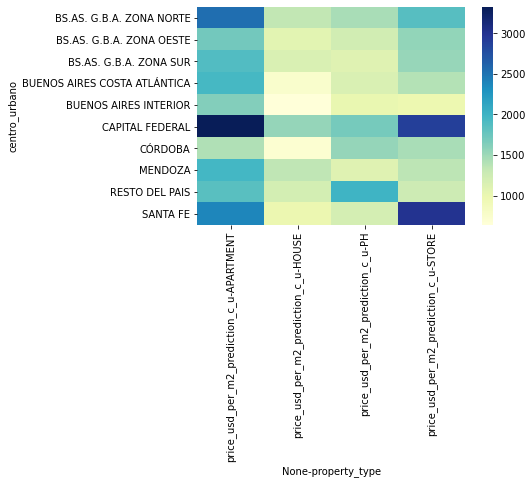

In [82]:
pivot_c_u = data.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2_prediction_c_u':'mean'}).round(2)
sns.heatmap(pivot_c_u, cmap="YlGnBu");

#### Imputamos eliminando outliers POR GRUPO 'centro_urbano-tipo' previamente

[volver a TOC](#section_toc)

Realizaremos la imputación de datos eliminando outiers por grupo. De esta forma se tendrá un valor más exacto a l momento de imputar y no se encontrará afecta por los outliers.

In [83]:
# Calculadora de rango de ouliers por grupo:

def found_limits(series_values):
    #print(series_values)
    q1 = series_values.quantile(0.25)
    q2 = series_values.quantile(0.50)
    q3 = series_values.quantile(0.75)
    #Rango intercuartil
    iqr = (q3 - q1) * 1.5
    up_threshold = q3 + iqr
    low_threshold = q1 - iqr
    return(q1 - iqr,q3 + iqr)

def limits_low_up(groupby):
    groupby_series = pd.Series(groupby)
    #groupby_series = pd.Series(groupby.index)    Franco habia puesto esto.
    #print(groupby.index)
    (limit_min, limit_max) = found_limits(groupby_series)
    return [limit_min,limit_max]

group_by_range_outliers = data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].apply(limits_low_up).to_frame()

In [84]:
# Asignación de rangos a cada grupo como columna nueva:

def range_assigned(row):
    create_tuple = (row['centro_urbano'],row['property_type'])
    return group_by_range_outliers.loc[create_tuple]
    
data['range_outliers'] = data.apply(range_assigned,axis=1)

In [85]:
data[['price_usd_per_m2','range_outliers']].sample(10)  # Vemos que tenemos la nueva columna. evaluaremos si el valor cae dentro del límite indicado por la nueva columna.

,price_usd_per_m2,range_outliers
21360,NaN,"[602.2727272727284, 2729.5454545454527]"
65504,4060.869565,"[524.6398467432946, 4755.2298850574725]"
2057,NaN,"[-657.4675324675329, 3095.7792207792218]"
119945,NaN,"[524.6398467432946, 4755.2298850574725]"
28903,2125.000000,"[602.2727272727284, 2729.5454545454527]"
48763,5162.452381,"[524.6398467432946, 4755.2298850574725]"
83041,NaN,"[658.5764021532705, 2740.753197669077]"
65461,994.827838,"[327.3188675107583, 2463.9347847567033]"
21768,3210.714286,"[524.6398467432946, 4755.2298850574725]"
63543,96.695862,"[-1599.274553571429, 6728.4536210317465]"


In [86]:
# Identificador de outliers. Verifica si el valor cae dentro del rango o nó o si es NaN:

def see(x):
    if (pd.notnull(x[0])):
        return x[0]<x[1][1] and x[0]>x[1][0]
    else:
        return np.NaN

flag_serie = data[['price_usd_per_m2','range_outliers']].apply(lambda x: see(x),axis=1)

In [87]:
flag_serie.value_counts(dropna=False) # True cae dentro del rango, no es oulier. False es un outlier. NaN es nulo. En función de esto imputaremos

True     65251
NaN      52603
False     3366
dtype: int64

In [88]:
data['flag_serie'] = flag_serie  # Creamos una columna indicando si es outlier o no o NaN.

In [89]:
# Valores con datos sin ouliers:
data_sin_outliers = data[data.flag_serie == True]

In [90]:
# Valores con o sin datos pero sin ouliers:
data_con_sin_datos_sin_outliers = data[data.flag_serie != False]

In [91]:
# Valore nulos, sin outliers:
data_sin_datos_sin_outliers = data[data.flag_serie.isnull()]

#### Imputamos eliminando outliers previamente, por la media POR GRUPO 'centro_urbano-tipo'

[volver a TOC](#section_toc)

In [92]:
# Creamos columnas nuevas donde almacenamos los valores predecidos:
data_con_sin_datos_sin_outliers["price_usd_per_m2_prediction_mean_c_u"] = data_con_sin_datos_sin_outliers.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].transform('mean')

<ipython-input-92-5c98817c46a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con_sin_datos_sin_outliers["price_usd_per_m2_prediction_mean_c_u"] = data_con_sin_datos_sin_outliers.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].transform('mean')


In [93]:
# Vemos los datos cómo se rellenarán:
data_con_sin_datos_sin_outliers[['price_usd_per_m2', "price_usd_per_m2_prediction_mean_c_u"]]

,price_usd_per_m2,price_usd_per_m2_prediction_mean_c_u
0,1127.272727,1662.882761
1,NaN,1810.509310
2,1309.090909,2555.015443
3,NaN,1662.882761
4,1828.571429,1919.173830
5,NaN,876.181997
6,1226.415094,1380.506871
7,3066.666667,2555.015443
8,3000.000000,2555.015443
9,NaN,752.899174


In [94]:
# Guardamos el valor de la media en los valores NaN:
data_con_sin_datos_sin_outliers.loc[data_con_sin_datos_sin_outliers['price_usd_per_m2'].isnull(),'price_usd_per_m2'] = data['price_usd_per_m2_prediction_mean_c_u']

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
# Vemos que no qedaron valores nulos:
data_con_sin_datos_sin_outliers['price_usd_per_m2'].isnull().sum()

0

In [96]:
# Pivot de la data imputada:
data_con_sin_datos_sin_outliers.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE              2415.09  1271.87  1406.77  1660.55
BS.AS. G.B.A. ZONA OESTE              1698.47   995.64  1145.42  1378.43
BS.AS. G.B.A. ZONA SUR                1848.09  1145.28  1095.67  1417.67
BUENOS AIRES COSTA ATLÁNTICA          1933.87   733.62  1128.90  1303.53
BUENOS AIRES INTERIOR                 1633.84   624.58  1019.89   987.67
CAPITAL FEDERAL                       2773.03  1402.96  1672.97  2667.59
CÓRDOBA                               1421.03   696.65  1455.02  1445.00
MENDOZA                               1762.21  1196.57  1113.72  1361.58
RESTO DEL PAIS                        1759.30  1101.48  2000.54  1245.73
SANTA FE                              2111.11   916.28  1220.38  2633.94

In [97]:
# Pivot de la data sin outliers ni nulos (limpios):
data_sin_outliers.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE              2358.06  1239.07  1380.51  1519.17
BS.AS. G.B.A. ZONA OESTE              1673.40   903.00  1092.91  1122.38
BS.AS. G.B.A. ZONA SUR                1810.51  1112.84  1066.33  1252.59
BUENOS AIRES COSTA ATLÁNTICA          1919.17   724.72  1112.11  1195.51
BUENOS AIRES INTERIOR                 1633.55   604.96  1019.89   987.67
CAPITAL FEDERAL                       2555.02  1322.68  1662.88  2547.95
CÓRDOBA                               1411.12   642.34   873.80  1401.21
MENDOZA                               1574.88   954.66  1113.72  1361.58
RESTO DEL PAIS                        1560.30   876.18  2000.54  1211.63
SANTA FE                              1680.18   752.90  1289.61  1534.44

---
<a id="section_expensas"></a> 
##  Diagrama de expensas para los valores existentes

[volver a TOC](#section_toc)

Si bien las expensas tienen valores faltantes, en función de la provincia y tipo de casa nos puede dar una idea de los impuestos en dicha categoría.

In [98]:
# Podríamos analizar las expensas de solo los elementos que tienen el dato para sacar alguna inferencia en general.
my_info_columnas(data)
my_columna_valores(data, col='expenses')

TypeError: unhashable type: 'list'

Vemos que expenses es uno de los datos con mas valores NaN.

Pero si solo analizamos los que tengan valor podemos tener una idea del costo de las expensas por esa region y tipo de propiedad

In [99]:
# Veamos su % de nulos por CADA GRUPO provincia-tipo para tener un noción de valores faltantes:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['expenses'].isnull().sum()/len(x)*100).round(2))

state_name                    property_type
BS.AS. G.B.A. ZONA NORTE      APARTMENT         84.75
                              HOUSE             89.94
                              PH                95.63
                              STORE             87.44
BS.AS. G.B.A. ZONA OESTE      APARTMENT         86.62
                              HOUSE             97.86
                              PH                95.94
                              STORE             93.25
BS.AS. G.B.A. ZONA SUR        APARTMENT         79.12
                              HOUSE             92.24
                              PH                94.76
                              STORE             93.43
BUENOS AIRES COSTA ATLÁNTICA  APARTMENT         93.61
                              HOUSE             99.52
                              PH                98.78
                              STORE             97.54
BUENOS AIRES INTERIOR         APARTMENT         93.85
                              HOUSE   

In [103]:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                             
property_type                 APARTMENT      HOUSE       PH    STORE
state_name                                                          
BS.AS. G.B.A. ZONA NORTE        3021.64    5869.71   613.98  1564.11
BS.AS. G.B.A. ZONA OESTE        2818.10    3641.73   266.06  1190.82
BS.AS. G.B.A. ZONA SUR          1503.66    4589.92   462.49  1203.21
BUENOS AIRES COSTA ATLÁNTICA    2042.12    3284.69   718.57  2201.57
BUENOS AIRES INTERIOR            891.92    4508.27   620.00      NaN
CAPITAL FEDERAL                 6634.88    2675.92   962.73  2896.55
CHACO                           2100.00        NaN      NaN      NaN
CHUBUT                              NaN        NaN      NaN  1000.00
CORRIENTES                       594.29    3545.56   600.80     1.00
CÓRDOBA                         3004.11    9401.82  1221.76  1704.92
ENTRE RÍOS                       606.86        NaN   400.00   300.50
FORMOSA                         1120.00        NaN      NaN      NaN
LA PAMPA                         983.33        NaN      NaN      NaN
MENDOZA                       108040.00    5669.54      NaN      NaN
MISIONES                        2500.00        NaN      NaN      NaN
NEUQUÉN                         1015.93     964.25   517.00   500.00
RÍO NEGRO                       1096.80    2000.50     1.00  5500.50
SALTA                           4100.00    2500.00      NaN      NaN
SAN LUIS                         783.33    3801.00      NaN      NaN
SANTA FE                        1429.94  107839.43   520.00   812.22
SANTIAGO DEL ESTERO                 NaN       1.00      NaN      NaN
TIERRA DEL FUEGO                    NaN     300.00      NaN      NaN
TUCUMÁN                         2023.41    2679.63  1500.00  4516.25

Podemos ver que en Mendoza y Salta tienen un valor exageradamente alto para expensas. Veremos dichos outliers:

In [104]:
# Analizamos Mendoza en particular los apartment que tienen la mayor expensa:
data_mendoza = data.loc[(data['state_name'] == 'Mendoza') & (data['property_type'] == 'apartment'), :]  
data_mendoza['expenses'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: expenses, dtype: float64

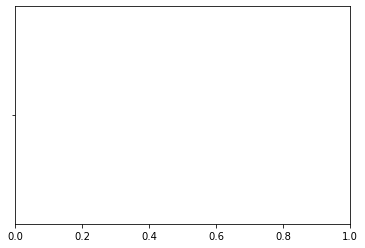

In [105]:
# Veamos su boxplot:
sns.boxplot(x=data_mendoza['expenses'].values);

Vemos que tiene outliers importantes. Los eliminaremos y volvemos a graficar:

In [106]:
# Buscamos outliers:
serie_mendoza_expenses = data_mendoza['expenses']  # Serie de la columna Mendoza
q1 = serie_mendoza_expenses.quantile(0.25)
q2 = serie_mendoza_expenses.quantile(0.50)
q3 = serie_mendoza_expenses.quantile(0.75)

#Rango intercuartil:
iqr = (q3 - q1) * 1.5

#Umbrales:
up_threshold = q3 + iqr
low_threshold = q1 - iqr

print("Límite superior: ", up_threshold)
print("Límite inferior:", low_threshold)

Límite superior:  nan
Límite inferior: nan


In [107]:
# Máscaras para filtrar outliers
outlier_mask = np.logical_or(serie_mendoza_expenses>up_threshold, serie_mendoza_expenses<low_threshold)  # Máscara para detectar outliers.
not_outlier_mask = np.logical_not(outlier_mask)                                                          # Máscara para NO outliers.

In [108]:
# Los outliers son:
outliers_expenses_mendoza = serie_mendoza_expenses[outlier_mask]
outliers_expenses_mendoza

Series([], Name: expenses, dtype: float64)

In [109]:
# Filtramos no_outliers y vemos los parámetros:
no_outliers_expenses_mendoza = serie_mendoza_expenses[not_outlier_mask]
no_outliers_expenses_mendoza.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: expenses, dtype: float64

Vemos como mejoró la media del grupo.

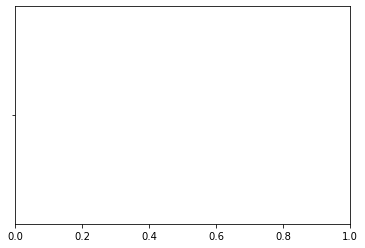

In [110]:
# Graficamos nuevamente los valores ahora sin outliers:
sns.boxplot(x = no_outliers_expenses_mendoza.values);

In [111]:
# Borramos los outliers de la serie entonces.
serie_mendoza_expenses[outlier_mask] = np.nan   # Asigno NaN a los outliers
serie_mendoza_expenses[outlier_mask]

<ipython-input-111-f8e8a32b2535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_mendoza_expenses[outlier_mask] = np.nan   # Asigno NaN a los outliers
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Series([], Name: expenses, dtype: float64)

In [112]:
# Si desearíamos rellenar los NaN con la media sin outlier debemos realizar un fillna de la media
#no_outliers_expenses_mendoza_mean = no_outliers_expenses_mendoza.mean().round(2)
#serie_mendoza_expenses.fillna(no_outliers_expenses_mendoza_mean, inplace=True)

In [113]:
# Guardamos la modificación en el dataframe original:
data.loc[(data['state_name'] == 'Mendoza') & (data['property_type'] == 'apartment'), 'expenses'] = serie_mendoza_expenses

# Volvemos arealizar la sumarizada y vemos lo datos de Mendoza:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                             
property_type                 APARTMENT      HOUSE       PH    STORE
state_name                                                          
BS.AS. G.B.A. ZONA NORTE        3021.64    5869.71   613.98  1564.11
BS.AS. G.B.A. ZONA OESTE        2818.10    3641.73   266.06  1190.82
BS.AS. G.B.A. ZONA SUR          1503.66    4589.92   462.49  1203.21
BUENOS AIRES COSTA ATLÁNTICA    2042.12    3284.69   718.57  2201.57
BUENOS AIRES INTERIOR            891.92    4508.27   620.00      NaN
CAPITAL FEDERAL                 6634.88    2675.92   962.73  2896.55
CHACO                           2100.00        NaN      NaN      NaN
CHUBUT                              NaN        NaN      NaN  1000.00
CORRIENTES                       594.29    3545.56   600.80     1.00
CÓRDOBA                         3004.11    9401.82  1221.76  1704.92
ENTRE RÍOS                       606.86        NaN   400.00   300.50
FORMOSA                         1120.00        NaN      NaN      NaN
LA PAMPA                         983.33        NaN      NaN      NaN
MENDOZA                       108040.00    5669.54      NaN      NaN
MISIONES                        2500.00        NaN      NaN      NaN
NEUQUÉN                         1015.93     964.25   517.00   500.00
RÍO NEGRO                       1096.80    2000.50     1.00  5500.50
SALTA                           4100.00    2500.00      NaN      NaN
SAN LUIS                         783.33    3801.00      NaN      NaN
SANTA FE                        1429.94  107839.43   520.00   812.22
SANTIAGO DEL ESTERO                 NaN       1.00      NaN      NaN
TIERRA DEL FUEGO                    NaN     300.00      NaN      NaN
TUCUMÁN                         2023.41    2679.63  1500.00  4516.25

Si realizamos esto mismo para Santa Fe podremos obtener una idea de los valores aproximados de los costos de expesas por provincia y tipo de propiedad.

---
<a id="section_categorizacion"></a> 
##  Gráficos variables categóricas

[volver a TOC](#section_toc)

#### Proporción de inmuebles por tipo

[volver a TOC](#section_toc)

Es importante saber la cproporción de inmuebles que maneja la inmobiliaria.

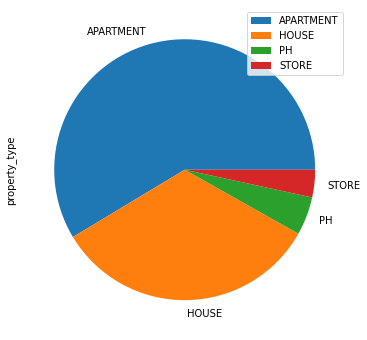

In [114]:
serie_pie = data.groupby('property_type')['property_type'].count().to_frame().plot(kind='pie', subplots=True, figsize=(6, 6))

# Como tenemos el tema de jupyter en negro no se ven las series.

#### Cantidad de inmuebles por región

[volver a TOC](#section_toc)

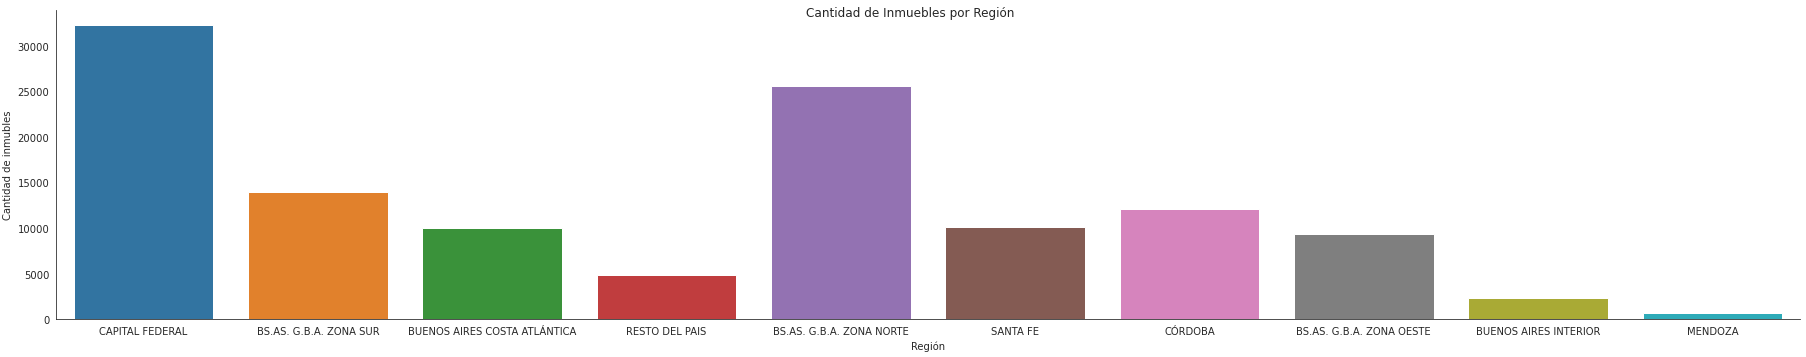

In [116]:
with sns.axes_style('white'):
    g = sns.catplot('centro_urbano', data=data, aspect=5, kind='count')
    g.set_axis_labels('Región', 'Cantidad de inmubles')
    g.fig.suptitle("Cantidad de Inmuebles por Región")

#### Cantidad de inmuebles por tipo y región

[volver a TOC](#section_toc)

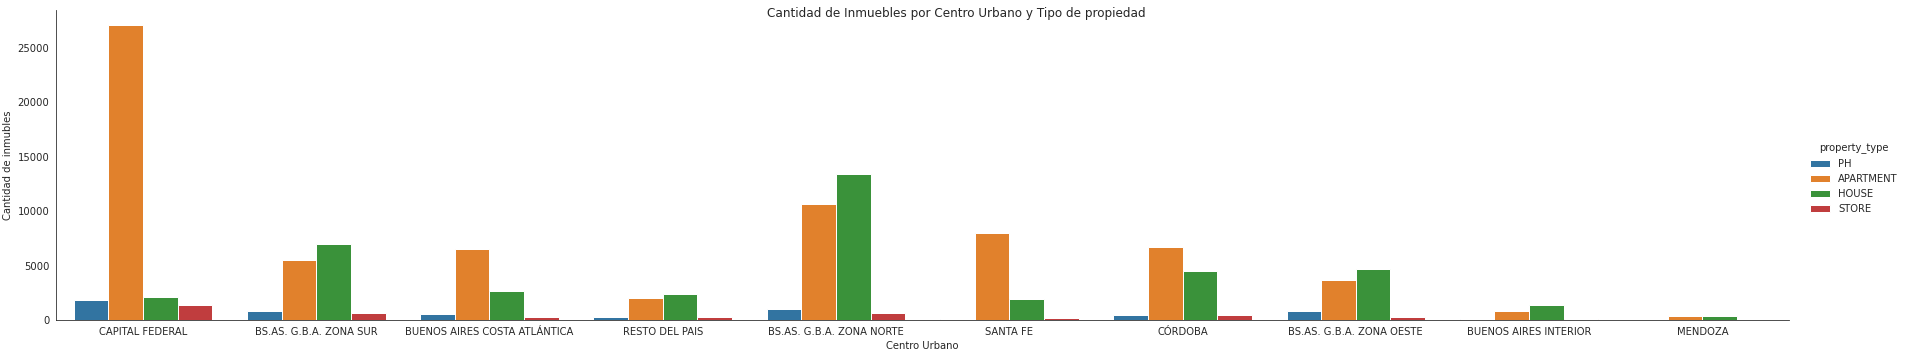

In [118]:
with sns.axes_style('white'):
    g = sns.catplot('centro_urbano', data=data, aspect=5, kind='count', hue='property_type') #order=range(2001, 2015)) # Ver que recibe un dataframe.
                                                                                                                # kind = count es barras. aspect es el tamaño del gráfico.
                                                                                                                # hue es la categoría/serie. order es el rango eje X.
    g.set_axis_labels('Centro Urbano', 'Cantidad de inmubles')                                                               # Etiqueta eje Y.
    g.fig.suptitle("Cantidad de Inmuebles por Centro Urbano y Tipo de propiedad")

#### Cantidad de inmubles por rango de precios y tipo de inmueble - Categorización de los precios

[volver a TOC](#section_toc)

Sería buena idea graficar en un diagrama de barras, cuántos inmuebles tenemos por tipo y por rango de precios.

Categorizamos a los precios de los inmuebles mediante intervalos, para tener una noción del rango de precios que maneja la inmobiliaria.

In [119]:
price_usd_cat, x_bins = pd.qcut(data.price_aprox_usd, 10, retbins=True)  # Devuelve serie categorizada en función de los cuartiles.
data['price_usd_cat'] = price_usd_cat                                    # Pegamos la categorización al df.

print(x_bins)                                                            # Son los intervalos creados percentiles.

[       0.      65000.      81600.      98146.43   120000.     145000.
   179000.     231027.3    310000.     470000.   46545445.  ]


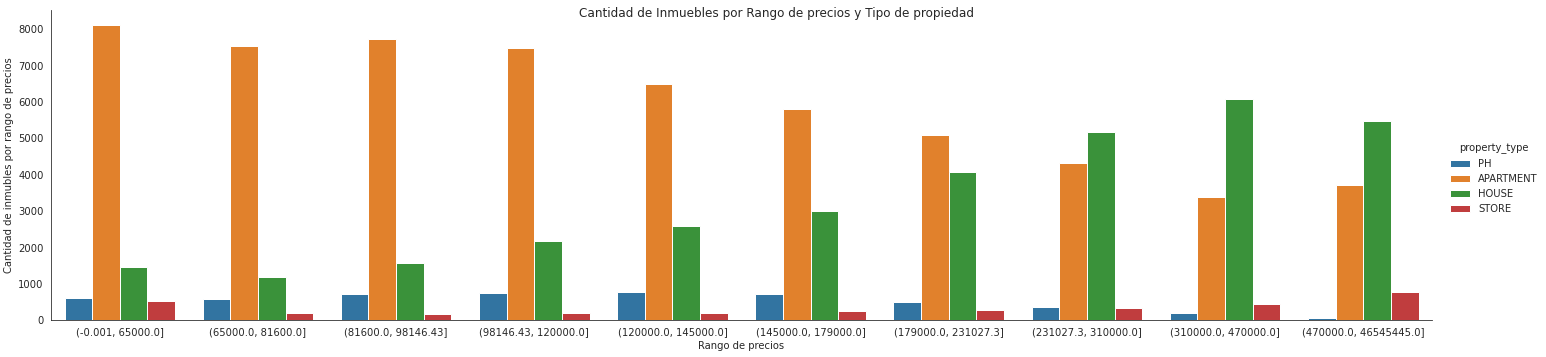

In [121]:
with sns.axes_style('white'):
    g = sns.catplot('price_usd_cat', data=data, aspect=4.0, kind='count', hue='property_type') #order=range(2001, 2015)) # Ver que recibe un dataframe.
                                                                                                                # kind = count es barras. aspect es el tamaño del gráfico.
                                                                                                                # hue es la categoría/serie. order es el rango eje X.
    g.set_axis_labels('Rango de precios', 'Cantidad de inmubles por rango de precios')                                                               # Etiqueta eje Y.
    g.fig.suptitle("Cantidad de Inmuebles por Rango de precios y Tipo de propiedad")

In [122]:
# Verificamos algunos de los grupos.
data.loc[data.price_aprox_usd>470000, 'property_type'].count()

10011

---
<a id="section_graficos"></a> 
##  Gráficos variables contínua

[volver a TOC](#section_toc)

La idea de esta sección es sacar algunas conclusiones sobre los campos calculados e imputados del dataset por medio de gráficos de las variables contínuas.

#### Boxplot distibución de precios por centro_urbano y por tipo

[volver a TOC](#section_toc)

Si graficamos la información sin limpiarla podemos ver la cantidad de outliers:

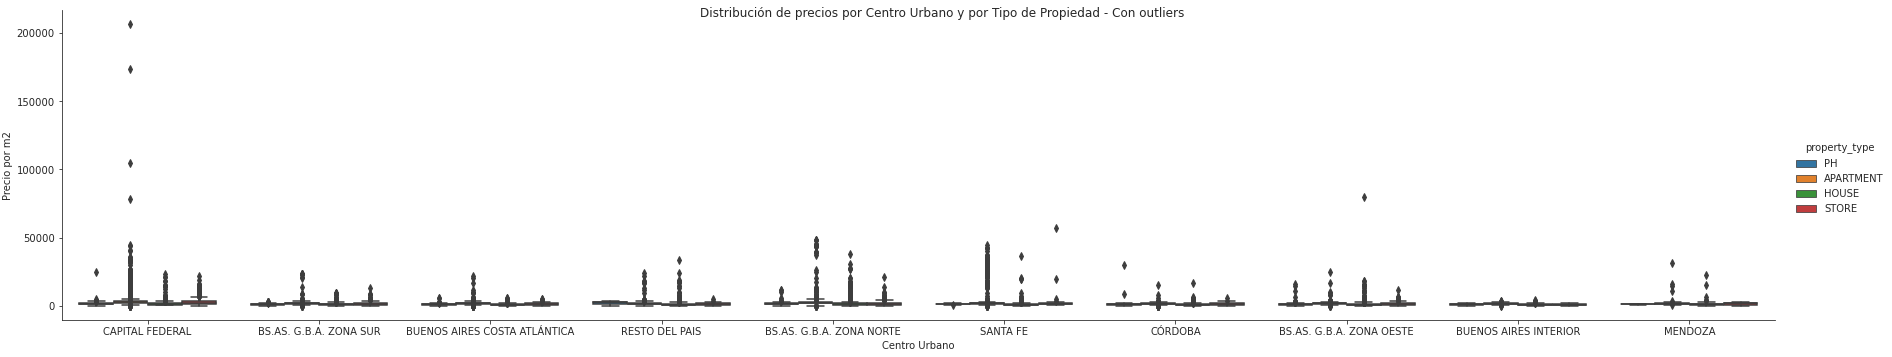

In [124]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type' , data=data, kind="box", aspect=5.0)   
                        # Si queremos aplicar algun filtro:               data.loc[(data['property_type'] == 'HOUSE') & (data['centro_urbano'] != 'CAPITAL FEDERAL'), :]
    g.set_axis_labels("Centro Urbano", "Precio por m2"); 
    g.fig.suptitle("Distribución de precios por Centro Urbano y por Tipo de Propiedad - Con outliers")

Si graficamos sin outlers:

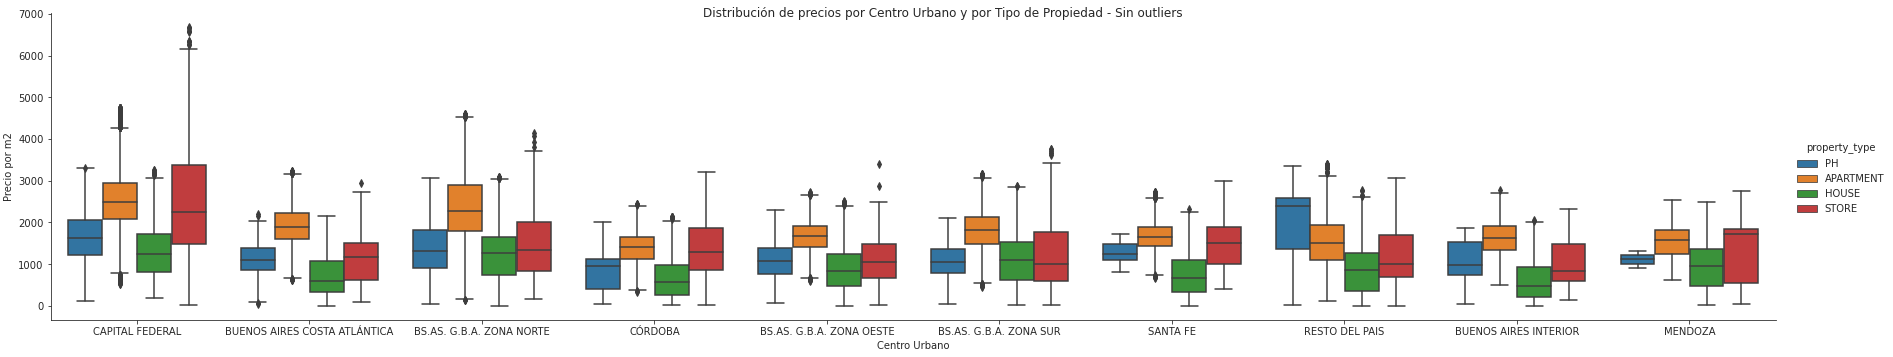

In [127]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type', data=data_sin_outliers, kind="box", aspect=5.0)    
    g.set_axis_labels("Centro Urbano", "Precio por m2");
    g.fig.suptitle("Distribución de precios por Centro Urbano y por Tipo de Propiedad - Sin outliers")

Si deseamos ser solo una serie:

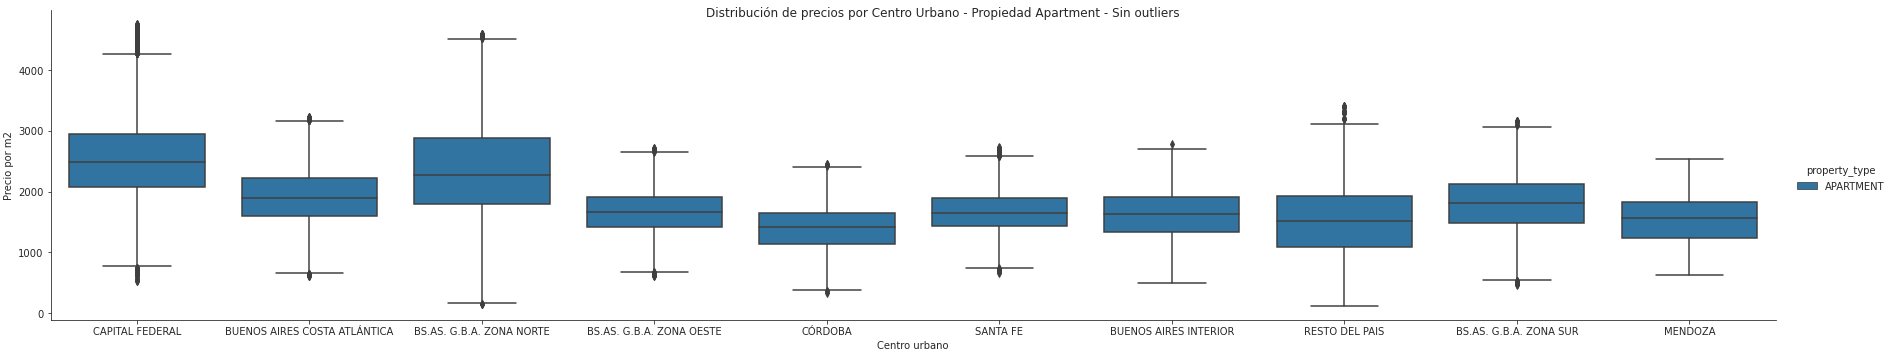

In [128]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type', data=data_sin_outliers[data_sin_outliers['property_type'] == 'APARTMENT'], kind="box", aspect=5.0)    
    g.set_axis_labels("Centro urbano", "Precio por m2");
    g.fig.suptitle("Distribución de precios por Centro Urbano - Propiedad Apartment - Sin outliers")

#### Scatertplots

[volver a TOC](#section_toc)

Text(0, 0.5, 'Expensas')

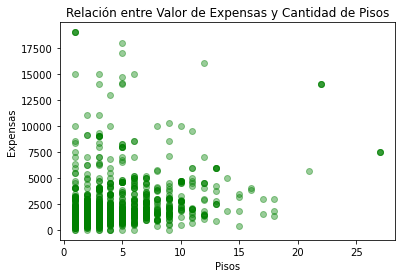

In [130]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['floor'], data['expenses'], marker = 'o', color = "green", alpha = 0.4)
plt.title("Relación entre Valor de Expensas y Cantidad de Pisos")
plt.xlabel("Pisos")
plt.ylabel("Expensas")

Text(0, 0.5, 'Precio por m2')

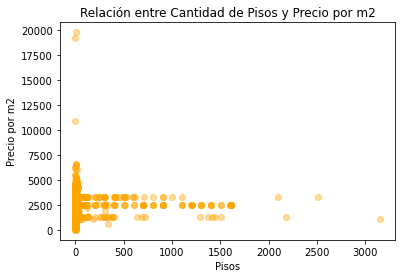

In [137]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['floor'], data['price_usd_per_m2_prediction'], marker = 'o', color = "orange", alpha = 0.4)
plt.title("Relación entre Cantidad de Pisos y Precio por m2")
plt.xlabel("Pisos")
plt.ylabel("Precio por m2")

Text(0, 0.5, 'Precio por m2')

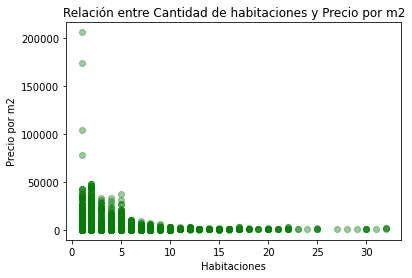

In [138]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['rooms'], data['price_usd_per_m2_prediction_c_u'], marker = 'o', color = "green", alpha = 0.4)
plt.title("Relación entre Cantidad de habitaciones y Precio por m2")
plt.xlabel("Habitaciones")
plt.ylabel("Precio por m2")

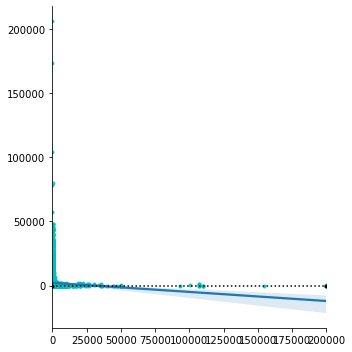

In [139]:
g = sns.lmplot('surface_total_in_m2', 'price_usd_per_m2_prediction_c_u', data=data, markers=".", scatter_kws=dict(color='c'))   # X, Y. Col es la categorización. Set de datos dataframe.
g.map(plt.axhline, y=0.1, color="k", ls=":");                                                                  # Solo dibuja una línea de referencia. 